In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
import geopandas
style.use('fivethirtyeight')

plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [151]:
from datetime import date

In [2]:
# citi = pd.read_csv(r'citi_bike_local.csv',
#                    parse_dates=['Start Time','Stop Time'],
#                    index_col=0)

citi = pd.read_csv(r'citi_bike_local_julie.csv',
                   parse_dates=['Start Time','Stop Time'],
                   index_col=0)

# citi = pd.read_csv(r'citi_bike_local_sara.csv',
#                    parse_dates=['Start Time','Stop Time'],
#                    index_col=0)

In [3]:
station_zipcode1 = pd.read_csv(r'station_zipcode.csv',
                   index_col=0,
                              )

In [4]:
station_zipcode1

station_id zipcode
0         3760.0   11237
1         3758.0   11237
2          467.0   11213
3          396.0   11216
4         3761.0   11221
...          ...     ...
1346      4114.0   10035
1347      4278.0   10006
1348      4310.0   11101
1349      3972.0   10451
1350      4468.0   10034

[1351 rows x 2 columns]

In [5]:
zipcode_dict = dict(zip(station_zipcode1.station_id, station_zipcode1.zipcode))


In [6]:
# # williamsburg coffee shop
# lat = 40.7116453
# lng = -73.9513869

# pilates studio
# lat = 40.7560568
# lng = -73.9834879

In [7]:
# citi['start_near'] = (((citi.loc[:,'Start Station Latitude']-lat)**2 + 
#      (citi.loc[:,'Start Station Longitude']-lng)**2)**.5<=.005)
# citi['start_near'] = (citi['start_near']==True).astype(int)

# citi['end_near'] = (((citi.loc[:,'End Station Latitude']-lat)**2 + 
#      (citi.loc[:,'End Station Longitude']-lng)**2)**.5<=.005)
# citi['end_near'] = (citi['end_near']==True).astype(int)

# citi['both_near'] = ((((citi.loc[:,'Start Station Latitude']-lat)**2 + 
#                          (citi.loc[:,'Start Station Longitude']-lng)**2)**.5<=.005)
#                        &
#                        (((citi.loc[:,'End Station Latitude']-lat)**2 + 
#                          (citi.loc[:,'End Station Longitude']-lng)**2)**.5<=.005))
# citi['both_near'] = (citi['both_near']==True).astype(int)



In [8]:
import geopy

def get_zipcode(df, geolocator, lat_field, lon_field):
    location = geolocator.reverse((df[lat_field], df[lon_field]))
    try:
        return location.raw['address']['postcode']
    except KeyError:
        return 'XXXXXXXXX'

def update_zip_code_dict(citi_, id_to_zipcode_={}):
    print('updatezipcode dict')
    current_id_to_zipcode = list(id_to_zipcode_.keys())
    citi_ = citi_[~citi_['End Station ID'].isin(current_id_to_zipcode)]
    citi_zip = citi_.drop_duplicates(subset=['End Station ID'])[['End Station ID',
                                                                    'End Station Latitude',
                                                                    'End Station Longitude']]
    try:
        print('get zipcode')
        geolocator = geopy.Nominatim(user_agent='testing_for_citi_bike')
        citi_zip['zipcodes'] = citi_zip.apply(get_zipcode, axis=1, geolocator=geolocator, 
                                            lat_field='End Station Latitude', 
                                            lon_field='End Station Longitude')
        
        id_to_zipcode_.update(dict(zip(citi_zip['End Station ID'], 
                                      citi_zip['zipcodes'])))
    except ValueError:
        print('No new ZIP codes.')
    return id_to_zipcode_

id_to_zipcode = update_zip_code_dict(citi,zipcode_dict)

updatezipcode dict
get zipcode
No new ZIP codes.


In [9]:
id_to_zipcode

{3760.0: '11237',
 3758.0: '11237',
 467.0: '11213',
 396.0: '11216',
 3761.0: '11221',
 3119.0: '11109',
 3058.0: '11221',
 3042.0: '11207',
 168.0: '10011',
 3118.0: '11109',
 366.0: '11205',
 3430.0: '11222',
 3108.0: '11222',
 343.0: '11205',
 3525.0: '11105',
 3047.0: '11233',
 3096.0: '11211',
 3072.0: '11222',
 3759.0: '11237',
 3389.0: '11231',
 3081.0: '11206',
 460.0: '11211',
 3398.0: '11231',
 3078.0: '11207',
 295.0: '10002',
 539.0: '11249',
 242.0: '11238',
 3093.0: '11249',
 3061.0: '11206',
 3776.0: '11221',
 3687.0: '10016',
 3086.0: '11211',
 229.0: '10012',
 3242.0: '11217',
 3756.0: '11206',
 3333.0: '11231',
 3352.0: '11231',
 3429.0: '11217',
 3599.0: '11225',
 3583.0: '11238',
 3454.0: '11222',
 3100.0: '11222',
 3056.0: '11216',
 3074.0: '11206',
 3727.0: '11222',
 369.0: '10011',
 3674.0: '11201',
 3076.0: '11206',
 3346.0: '11217',
 3052.0: '11221',
 3055.0: '11216',
 3414.0: '11213',
 251.0: '10012',
 3263.0: 'XXXXXXXXX',
 241.0: '11221',
 481.0: '11211',
 4

In [10]:
citi["end_zipcode"] = citi["End Station ID"].map(id_to_zipcode)

In [11]:
citi["start_zipcode"] = citi["Start Station ID"].map(id_to_zipcode)

In [12]:
citi.head()

Trip Duration          Start Time           Stop Time  Start Station ID  \
0            236 2016-04-01 00:02:15 2016-04-01 00:06:12            3087.0   
1            764 2016-04-01 00:38:04 2016-04-01 00:50:48            3079.0   
2            172 2016-04-01 00:55:38 2016-04-01 00:58:30            3087.0   
3            349 2016-04-01 01:05:46 2016-04-01 01:11:36            3067.0   
4            258 2016-04-01 01:25:52 2016-04-01 01:30:11            3082.0   

              Start Station Name  Start Station Latitude  \
0  Metropolitan Ave & Meeker Ave               40.714133   
1          Leonard St & Grand St               40.711035   
2  Metropolitan Ave & Meeker Ave               40.714133   
3          Broadway & Whipple St               40.701666   
4            Hope St & Union Ave               40.711674   

   Start Station Longitude  End Station ID            End Station Name  \
0               -73.952344          3086.0   Graham Ave & Conselyea St   
1               -73.947143          3055.0   Greene Ave & Nostrand Ave   
2               -73.952344          3082.0         Hope St & Union Ave   
3               -73.943730          3079.0       Leonard St & Grand St   
4               -73.951413          3076.0  Scholes St & Manhattan Ave   

   End Station Latitude  End Station Longitude  Bike ID   User Type  \
0             40.715143             -73.944507    15919  Subscriber   
1             40.688334             -73.950916    15202  Subscriber   
2             40.711674             -73.951413    18680  Subscriber   
3             40.711035             -73.947143    15925  Subscriber   
4             40.708704             -73.944862    18680  Subscriber   

   Birth Year  Gender  start_near  end_near  both_near end_zipcode  \
0      1990.0       1           1         0          0       11211   
1      1985.0       1           1         0          0       11216   
2      1972.0       2           1         1          1       11211   
3      1968.0       1           0         1          0       11222   
4      1972.0       2           1         0          0       11206   

  start_zipcode  
0         11211  
1         11222  
2         11211  
3         11207  
4         11211

In [13]:
len(citi)

760594

In [14]:
id_to_zipcode_df = pd.DataFrame(id_to_zipcode.items(), columns=['station_id', 'zipcode'])
id_to_zipcode_df.to_csv('station_zipcode.csv')

In [15]:
# g = sns.barplot(x = 'start_near', y = 'Trip Duration',
#                 data = citi,
#                )

In [16]:
# g = sns.barplot(x = 'end_near', y = 'Trip Duration',
#                 data = citi,
#                )

In [17]:
# g = sns.barplot(x = 'both_near', y = 'Trip Duration',
#                 data = citi,
#                )

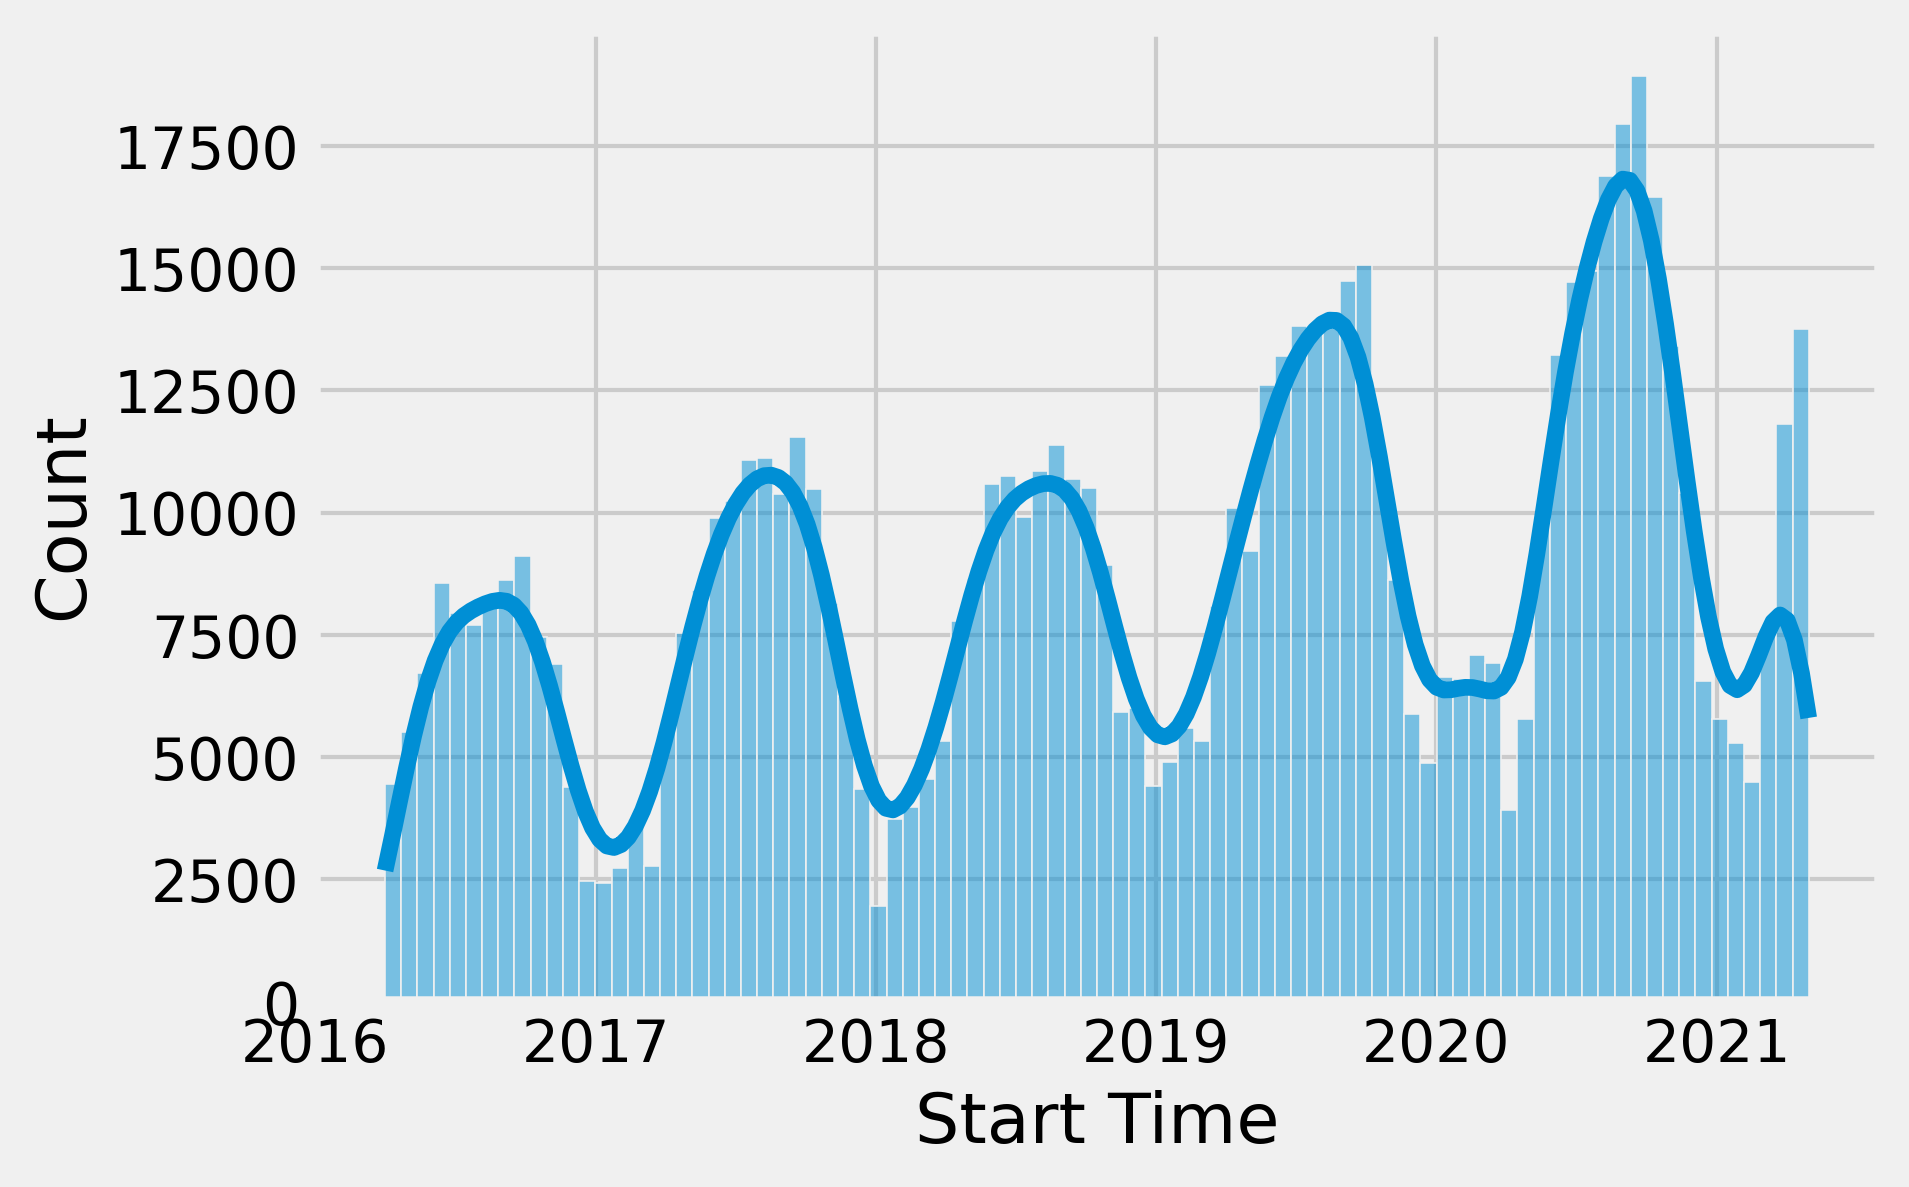

In [18]:
g = sns.histplot(data=citi, x="Start Time",kde=True)

In [138]:
citi['ride_month']= citi['Start Time'].dt.month

In [ ]:
f,(ax,ax2) = plt.subplots(1,2,sharey=True, facecolor='w')

# plot the same data on both axes
ax.plot(x, y)
ax2.plot(x, y)

ax.set_xlim(0,7.5)
ax2.set_xlim(40,42.5)

# hide the spines between ax and ax2
ax.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax.yaxis.tick_left()
ax.tick_params(labelright='off')
ax2.yaxis.tick_right()

(18383.0, 18567.0)

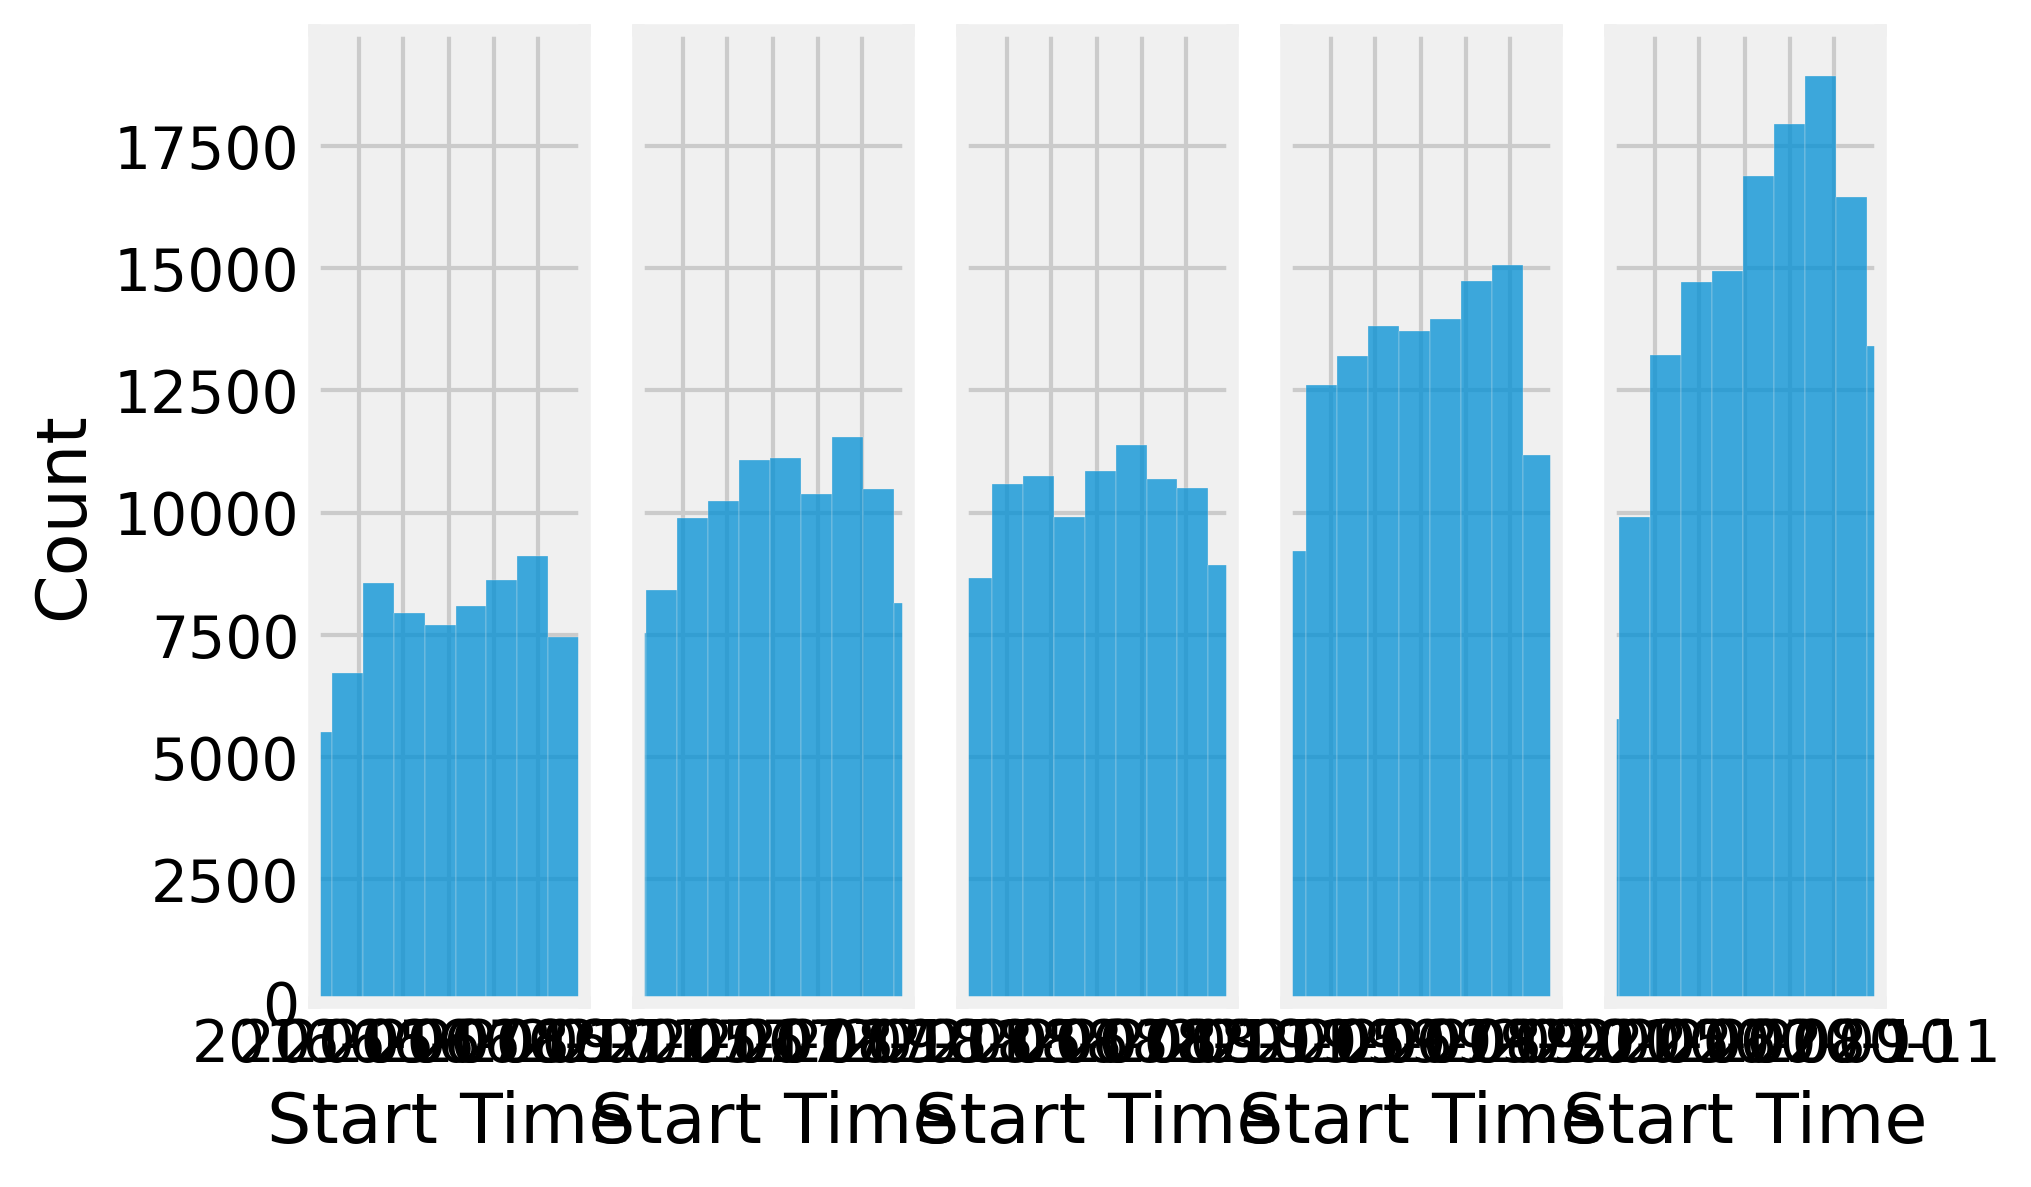

In [162]:
f,axs = plt.subplots(1,5,sharey=True, facecolor='w')
g = sns.histplot(data=citi,
    x="Start Time",ax=axs[0])
axs[0].set_xlim(date(2016, 5, 1),
                date(2016, 11, 1))
g2 = sns.histplot(data=citi,
    x="Start Time",ax=axs[1])
axs[1].set_xlim(date(2017, 5, 1),
                date(2017, 11, 1))
g3 = sns.histplot(data=citi,
    x="Start Time",ax=axs[2])
axs[2].set_xlim(date(2018, 5, 1),
                date(2018, 11, 1))
g4 = sns.histplot(data=citi,
    x="Start Time",ax=axs[3])
axs[3].set_xlim(date(2019, 5, 1),
                date(2019, 11, 1))
g5 = sns.histplot(data=citi,
    x="Start Time",ax=axs[4])
axs[4].set_xlim(date(2020, 5, 1),
                date(2020, 11, 1))
# axs[0].spines['right'].set_visible(False)
# axs[1].spines['left'].set_visible(False)

In [155]:
citi

Trip Duration              Start Time               Stop Time  \
0                 236 2016-04-01 00:02:15.000 2016-04-01 00:06:12.000   
1                 764 2016-04-01 00:38:04.000 2016-04-01 00:50:48.000   
2                 172 2016-04-01 00:55:38.000 2016-04-01 00:58:30.000   
3                 349 2016-04-01 01:05:46.000 2016-04-01 01:11:36.000   
4                 258 2016-04-01 01:25:52.000 2016-04-01 01:30:11.000   
...               ...                     ...                     ...   
760589           1116 2021-04-30 23:56:32.824 2021-05-01 00:15:09.400   
760590           1063 2021-04-30 23:57:37.557 2021-05-01 00:15:21.311   
760591           1019 2021-04-30 23:59:22.949 2021-05-01 00:16:22.707   
760592            471 2021-04-30 23:59:41.817 2021-05-01 00:07:33.416   
760593            282 2021-04-30 23:59:52.302 2021-05-01 00:04:34.378   

        Start Station ID             Start Station Name  \
0                 3087.0  Metropolitan Ave & Meeker Ave   
1                 3079.0          Leonard St & Grand St   
2                 3087.0  Metropolitan Ave & Meeker Ave   
3                 3067.0          Broadway & Whipple St   
4                 3082.0            Hope St & Union Ave   
...                  ...                            ...   
760589            3077.0           Stagg St & Union Ave   
760590            3454.0         Leonard St & Maujer St   
760591            3454.0         Leonard St & Maujer St   
760592            3077.0           Stagg St & Union Ave   
760593            3082.0            Hope St & Union Ave   

        Start Station Latitude  Start Station Longitude  End Station ID  \
0                    40.714133               -73.952344          3086.0   
1                    40.711035               -73.947143          3055.0   
2                    40.714133               -73.952344          3082.0   
3                    40.701666               -73.943730          3079.0   
4                    40.711674               -73.951413          3076.0   
...                        ...                      ...             ...   
760589               40.708771               -73.950953           317.0   
760590               40.710369               -73.947060           539.0   
760591               40.710369               -73.947060           539.0   
760592               40.708771               -73.950953          3430.0   
760593               40.711674               -73.951413           481.0   

                      End Station Name  End Station Latitude  ...  Birth Year  \
0            Graham Ave & Conselyea St             40.715143  ...      1990.0   
1            Greene Ave & Nostrand Ave             40.688334  ...      1985.0   
2                  Hope St & Union Ave             40.711674  ...      1972.0   
3                Leonard St & Grand St             40.711035  ...      1968.0   
4           Scholes St & Manhattan Ave             40.708704  ...      1972.0   
...                                ...                   ...  ...         ...   
760589               E 6 St & Avenue B             40.724537  ...      1970.0   
760590  Metropolitan Ave & Bedford Ave             40.715348  ...      1970.0   
760591  Metropolitan Ave & Bedford Ave             40.715348  ...      1970.0   
760592      Richardson St & N Henry St             40.719079  ...      1970.0   
760593            S 3 St & Bedford Ave             40.712605  ...      1970.0   

        Gender start_near  end_near  both_near  end_zipcode  start_zipcode  \
0            1          1         0          0        11211          11211   
1            1          1         0          0        11216          11222   
2            2          1         1          1        11211          11211   
3            1          0         1          0        11222          11207   
4            2          1         0          0        11206          11211   
...        ...        ...       ...        ...          ...            ...   
76

#### 

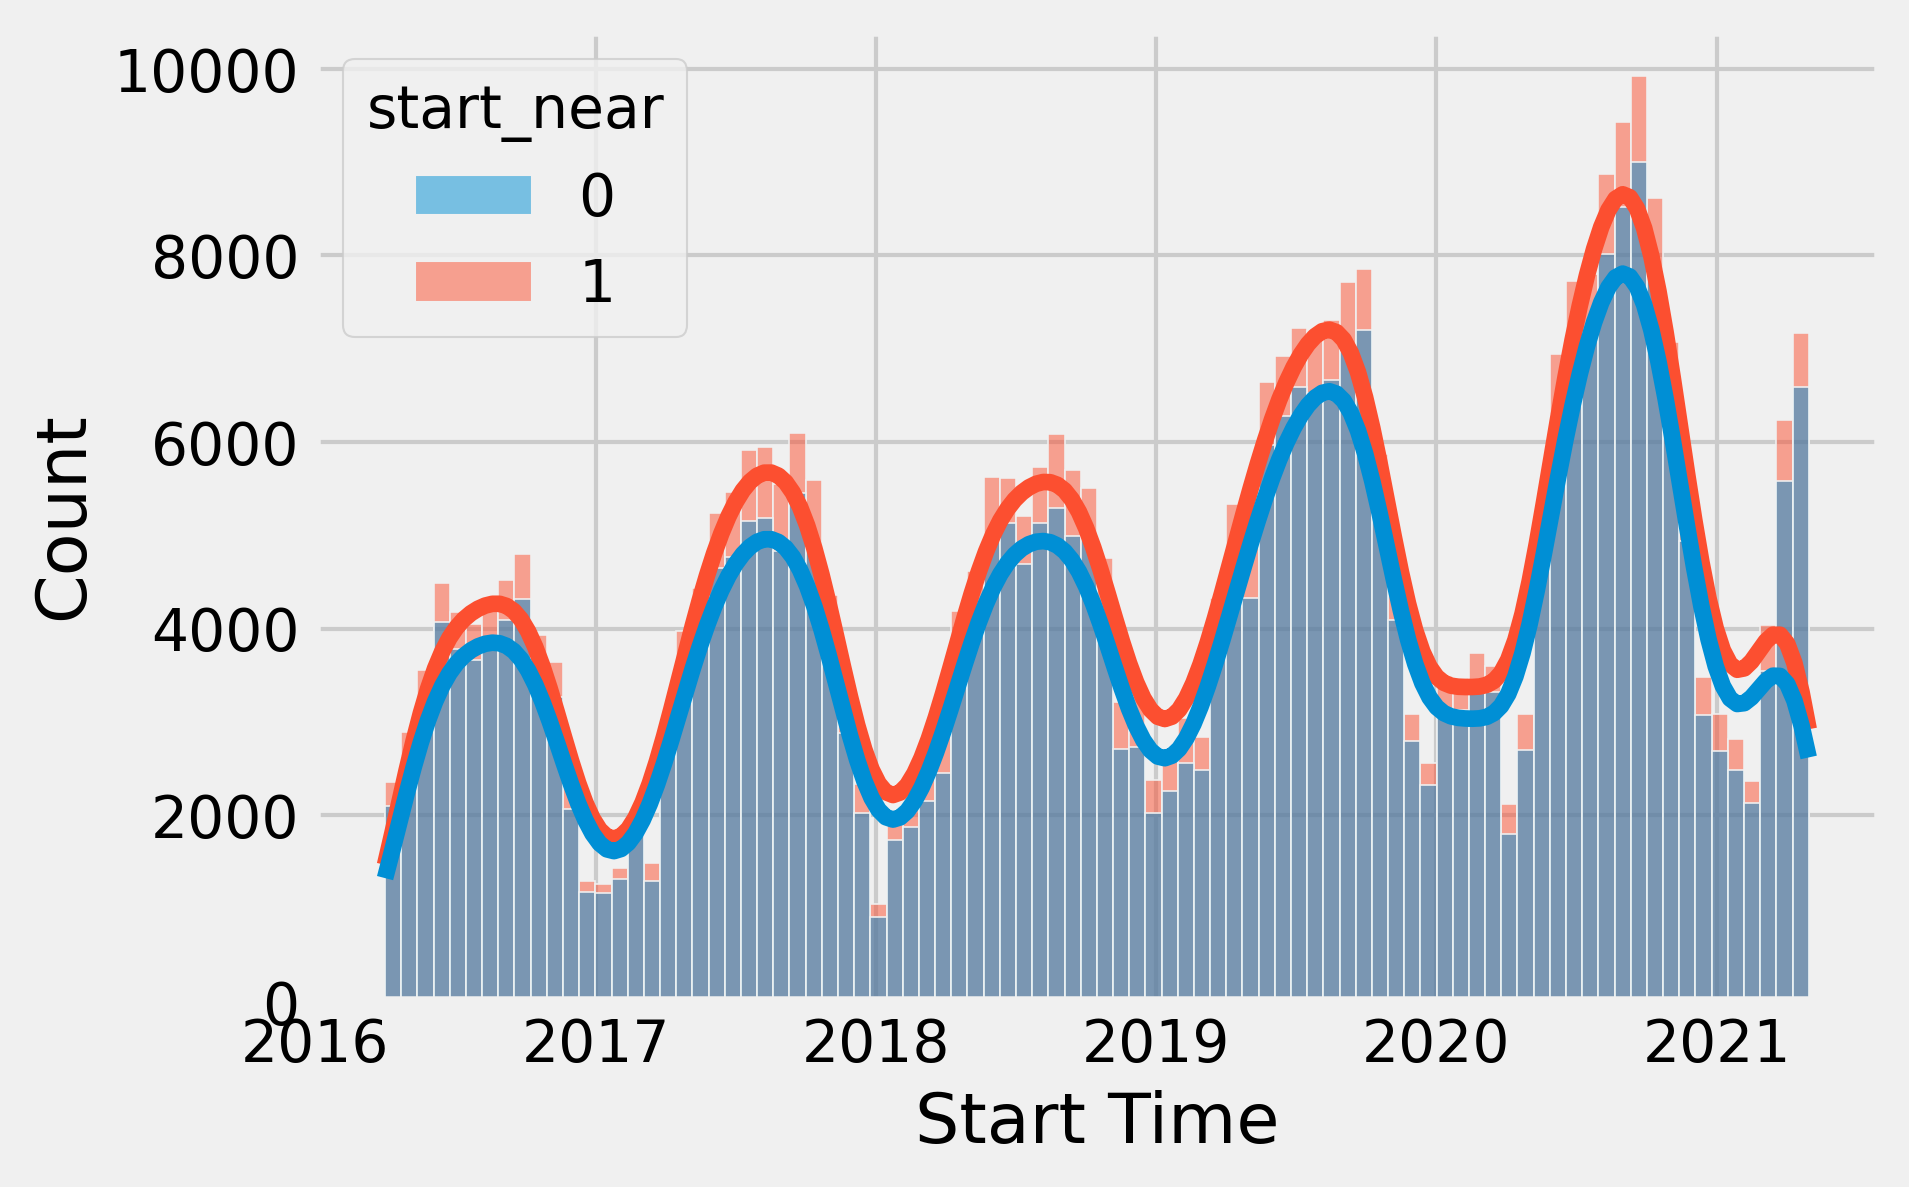

In [19]:
g = sns.histplot(data=citi, x="Start Time",
                 hue = 'start_near',
#                  multiple = 'stack',
                 kde=True)

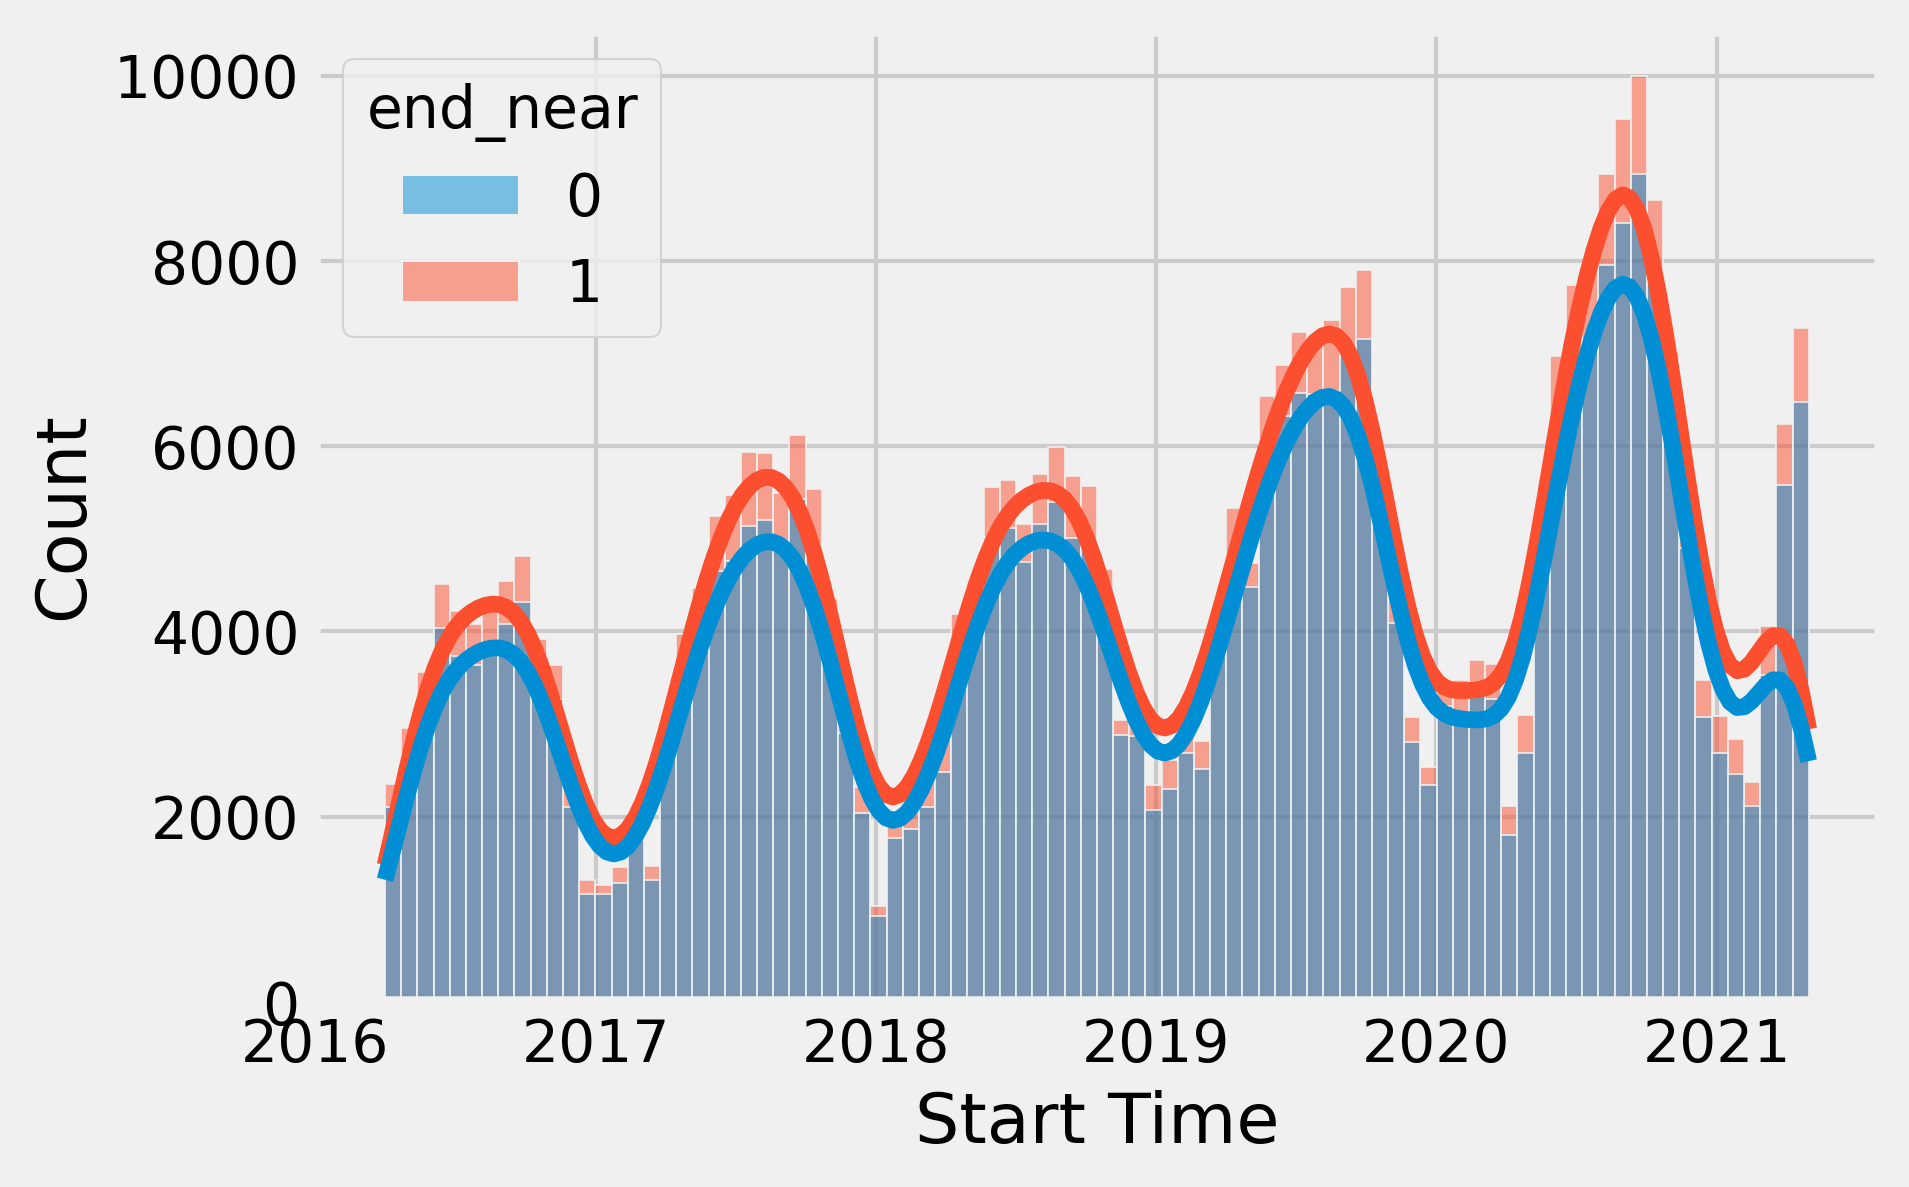

In [20]:
g = sns.histplot(data=citi, x="Start Time",
                 hue = 'end_near',
                 kde=True)

In [21]:
citi.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'start_near', 'end_near', 'both_near',
       'end_zipcode', 'start_zipcode'],
      dtype='object')

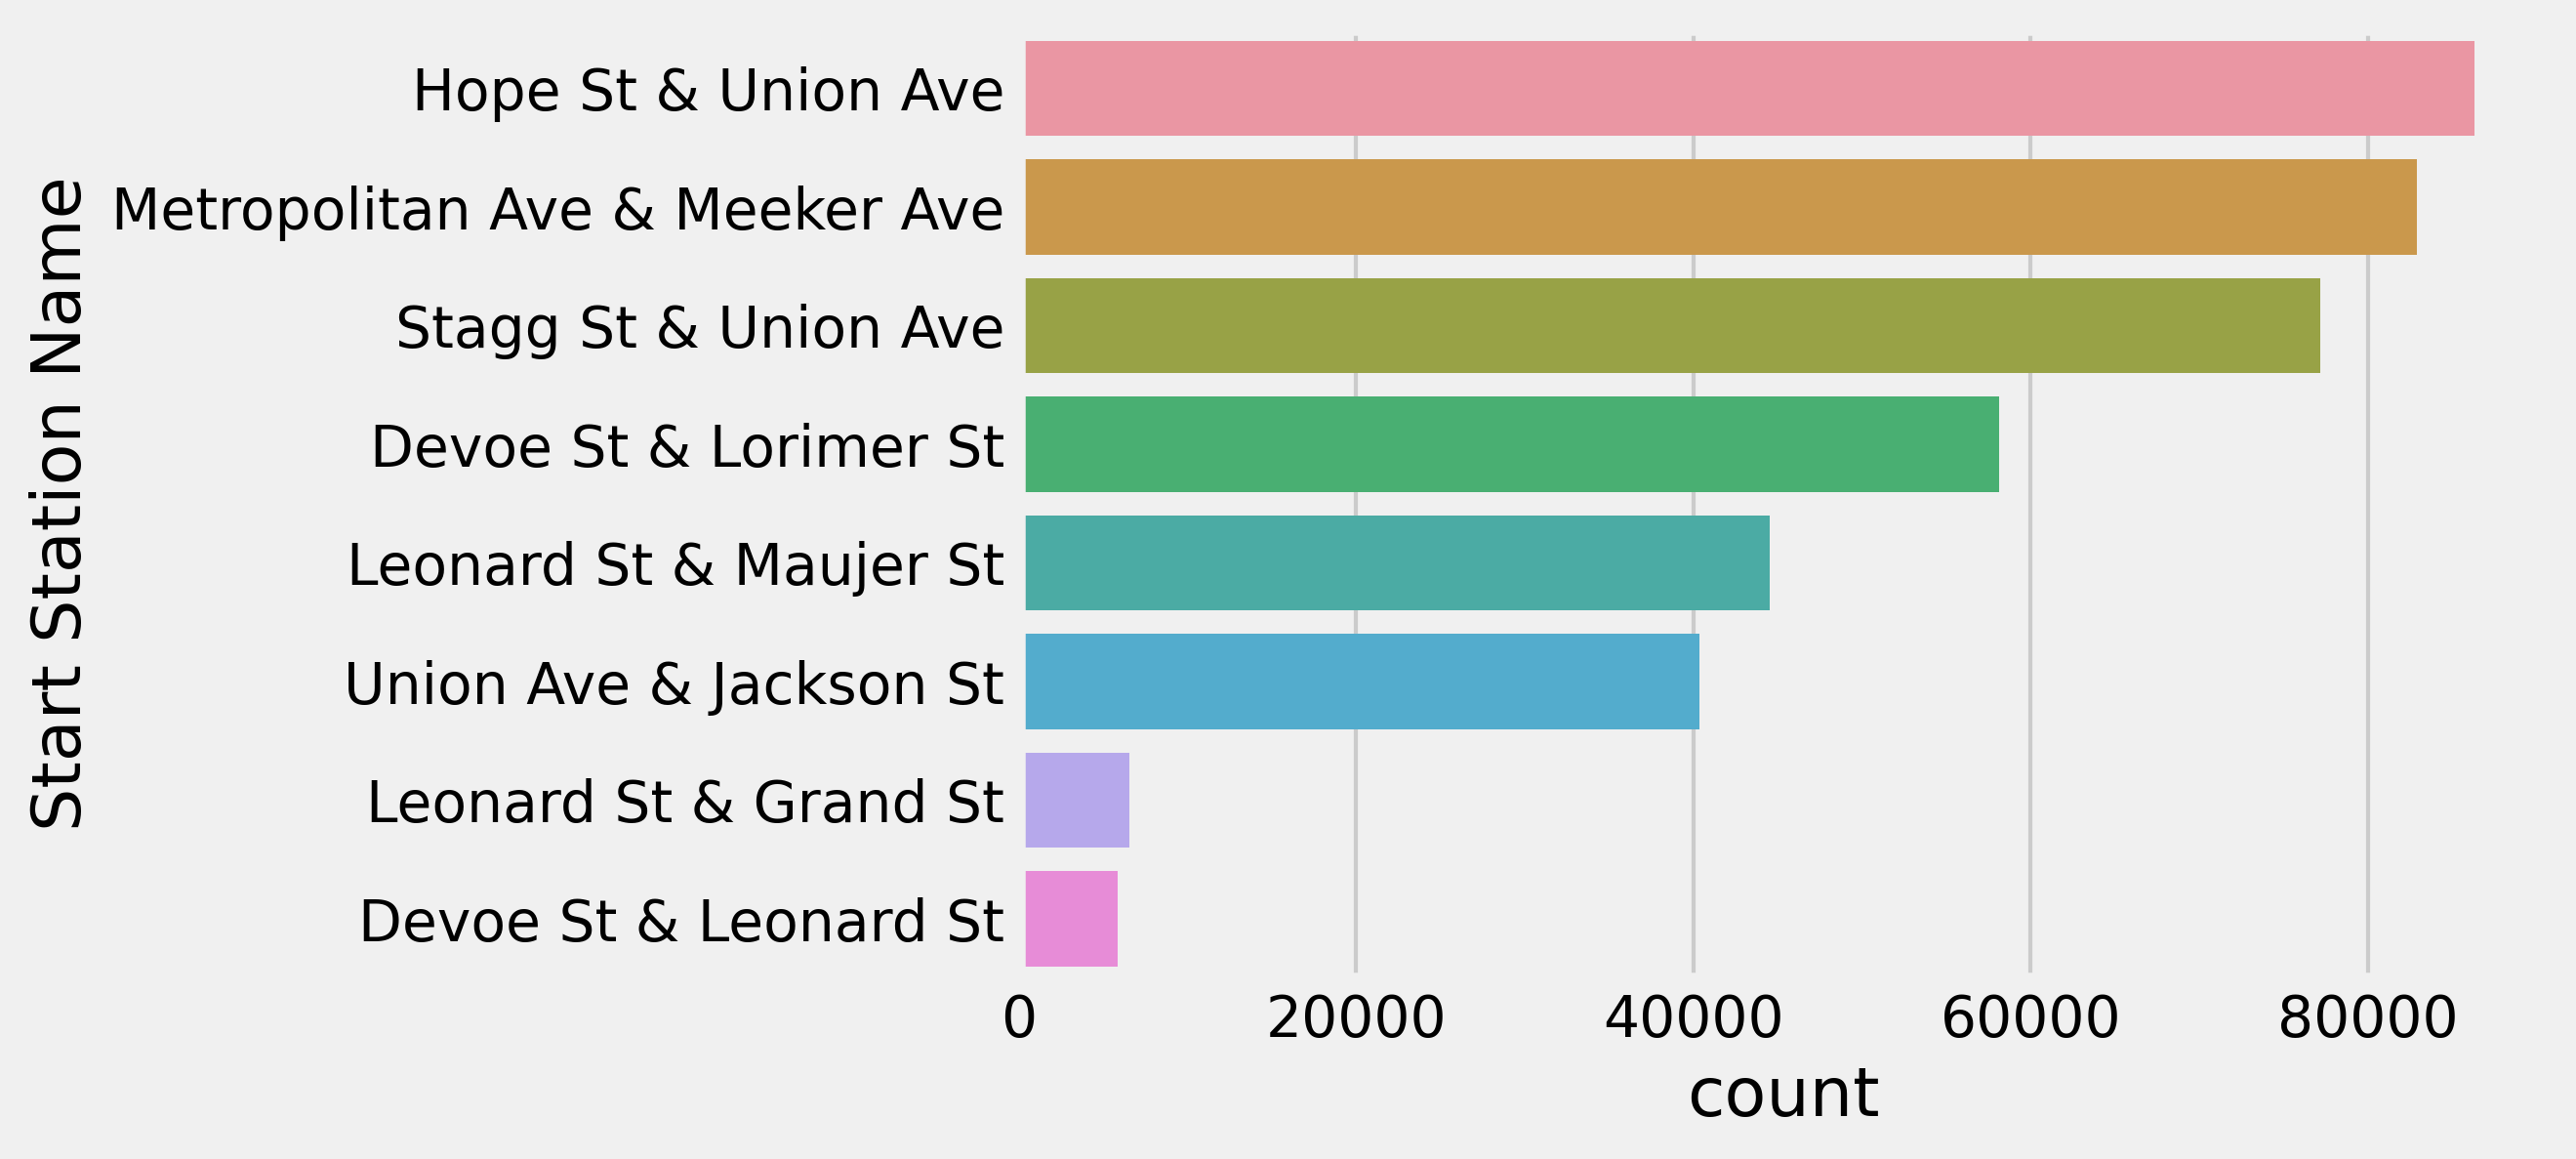

In [22]:
g = sns.countplot(y="Start Station Name", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['Start Station Name'].value_counts().index)


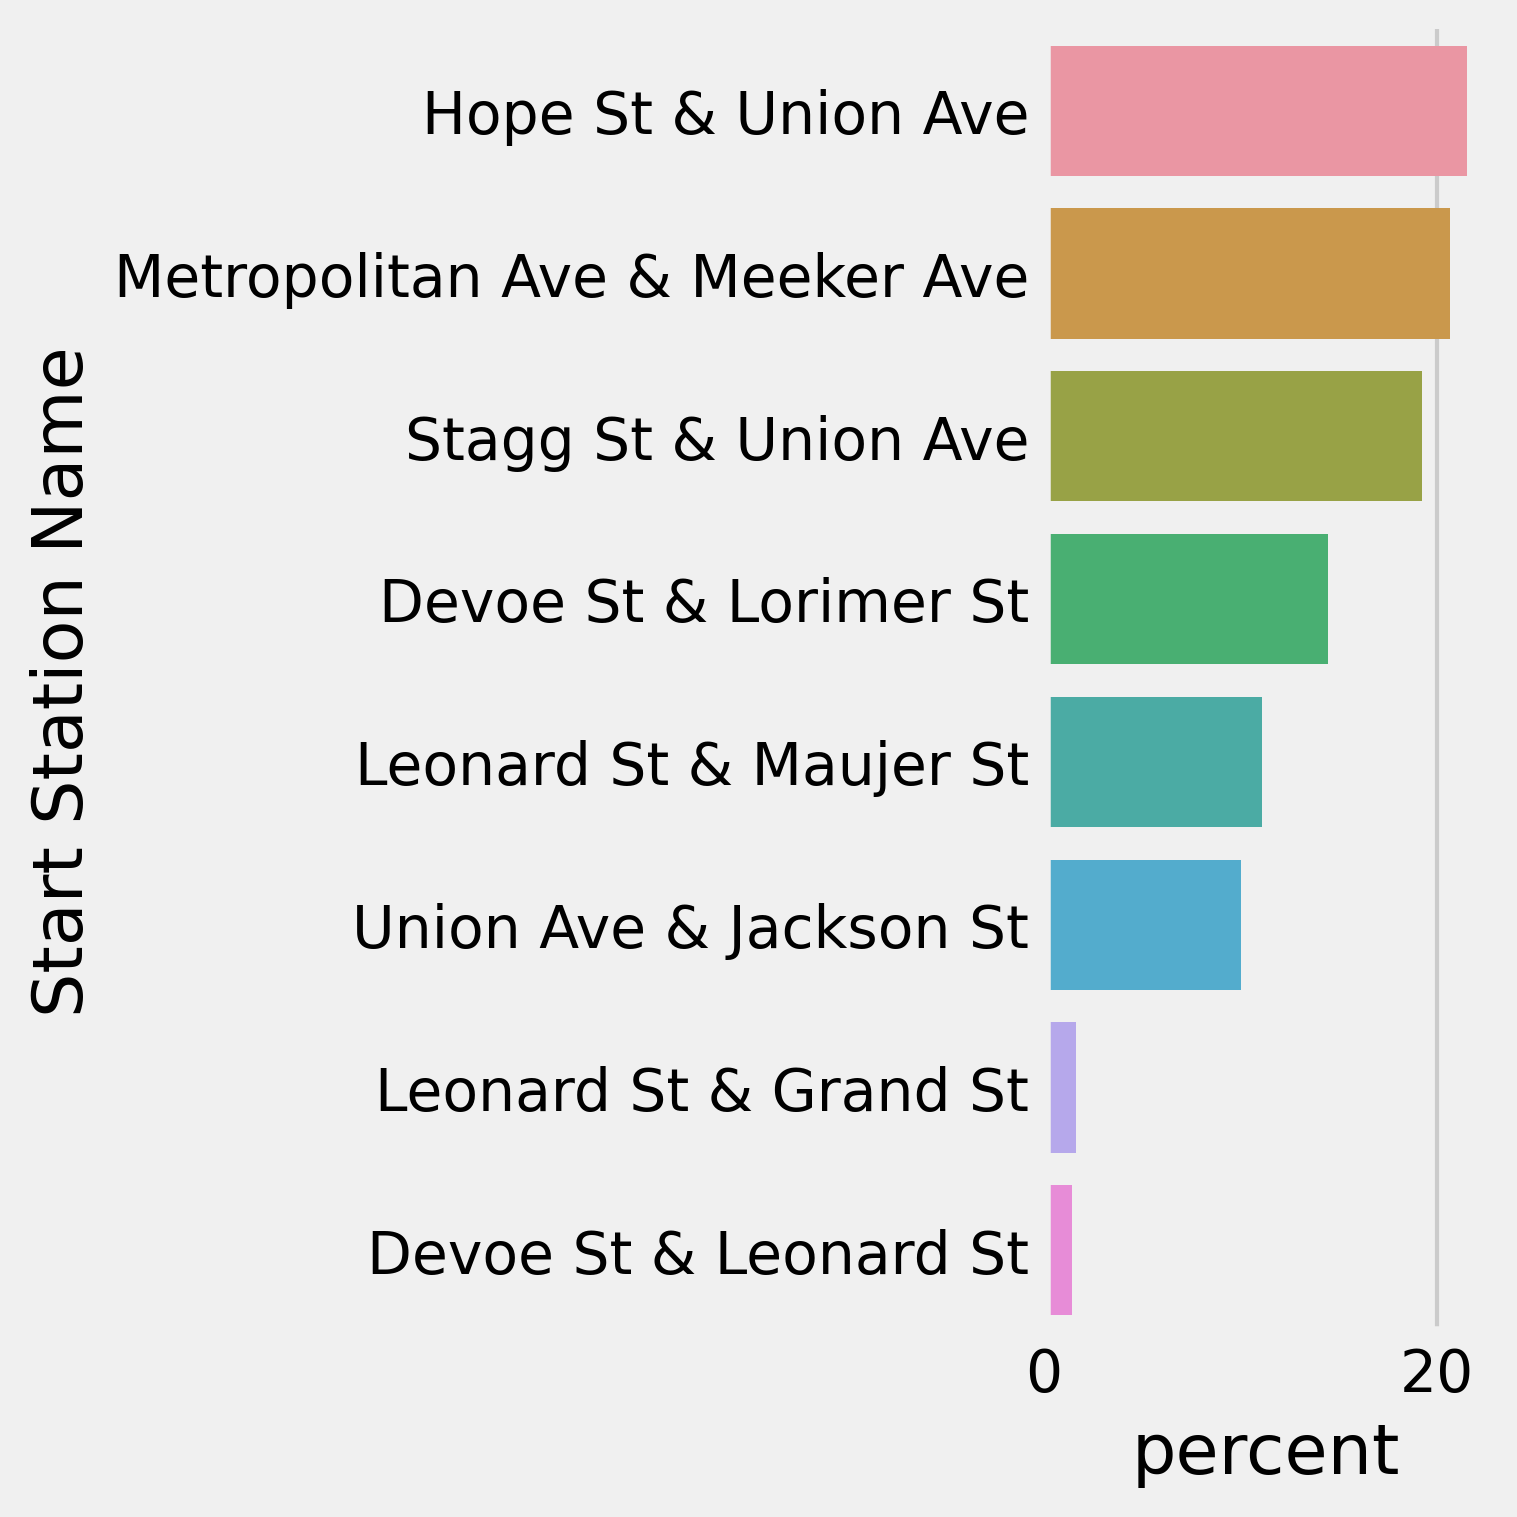

In [23]:
x,y = 'start_near','Start Station Name'

df = citi[citi[x]==1]

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='percent',y=y,kind='bar',data=df1)
# g.ax.set_xlim(0,100)

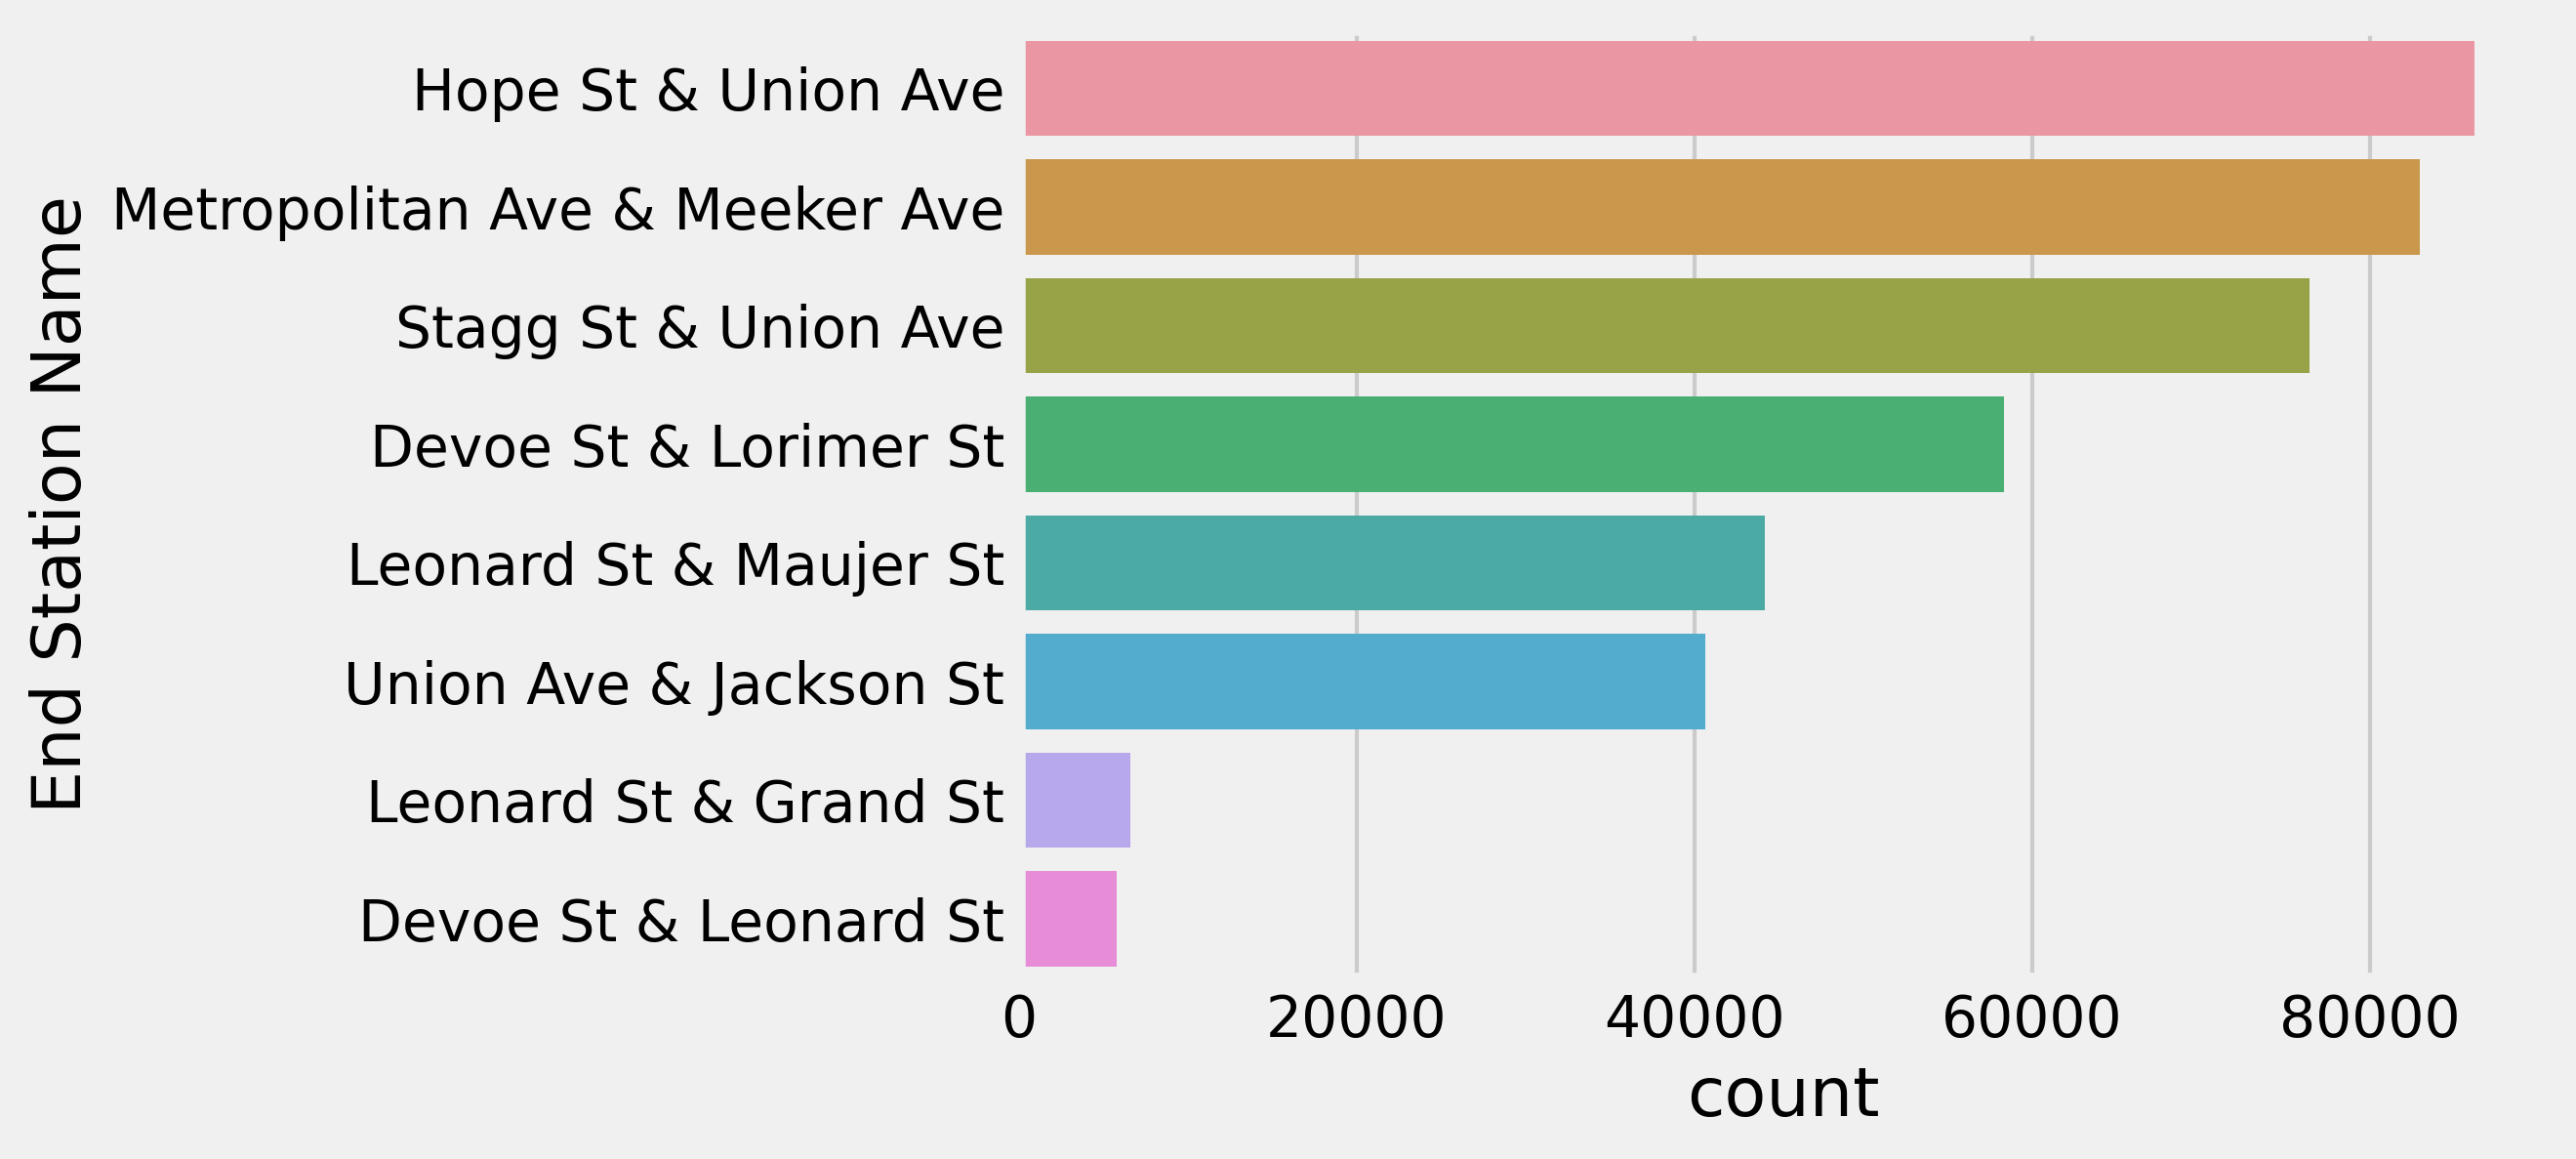

In [24]:
g = sns.countplot(y="End Station Name", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['End Station Name'].value_counts().index)


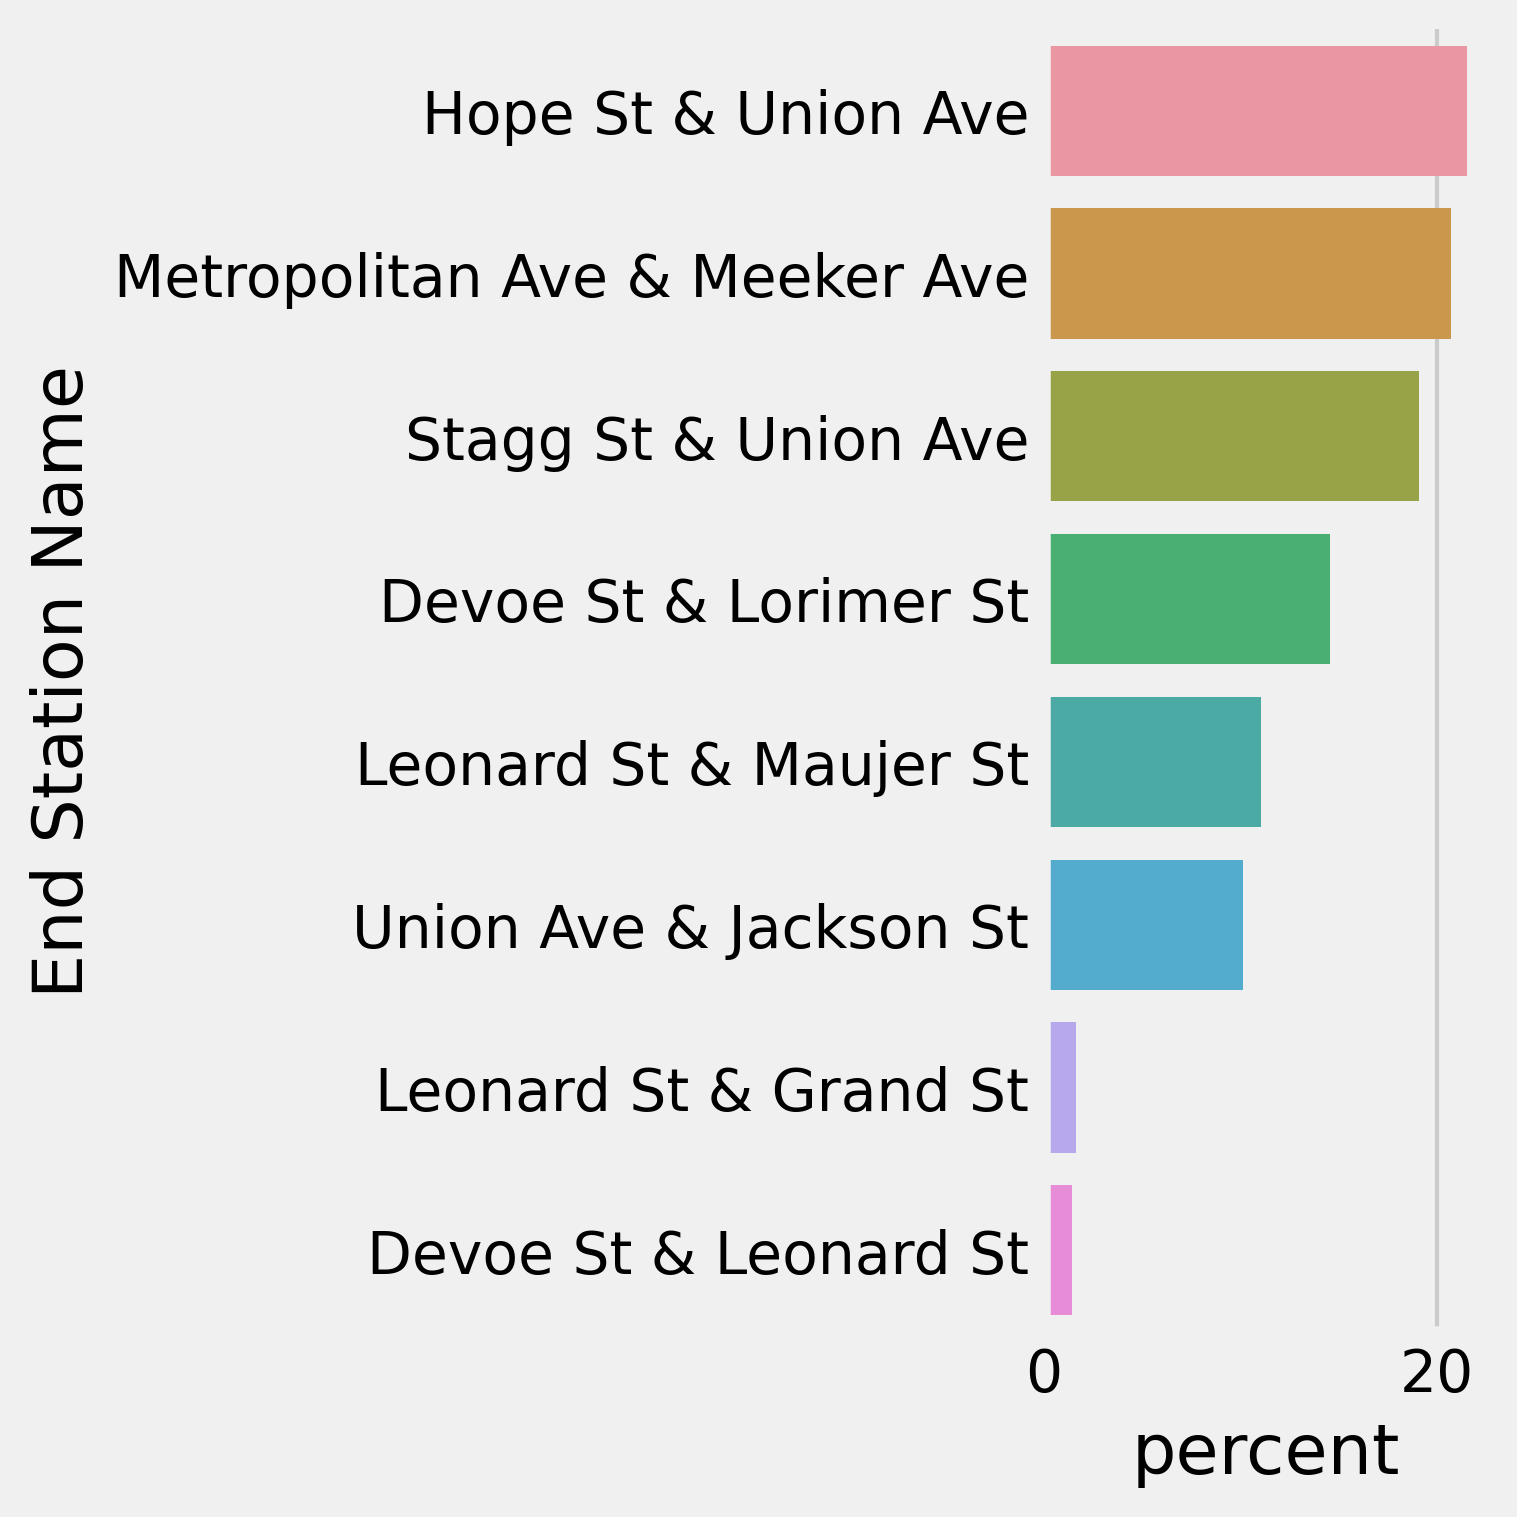

In [25]:
x,y = 'end_near','End Station Name'

df = citi[citi[x]==1]

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='percent',y=y,kind='bar',data=df1)
# g.ax.set_xlim(0,100)

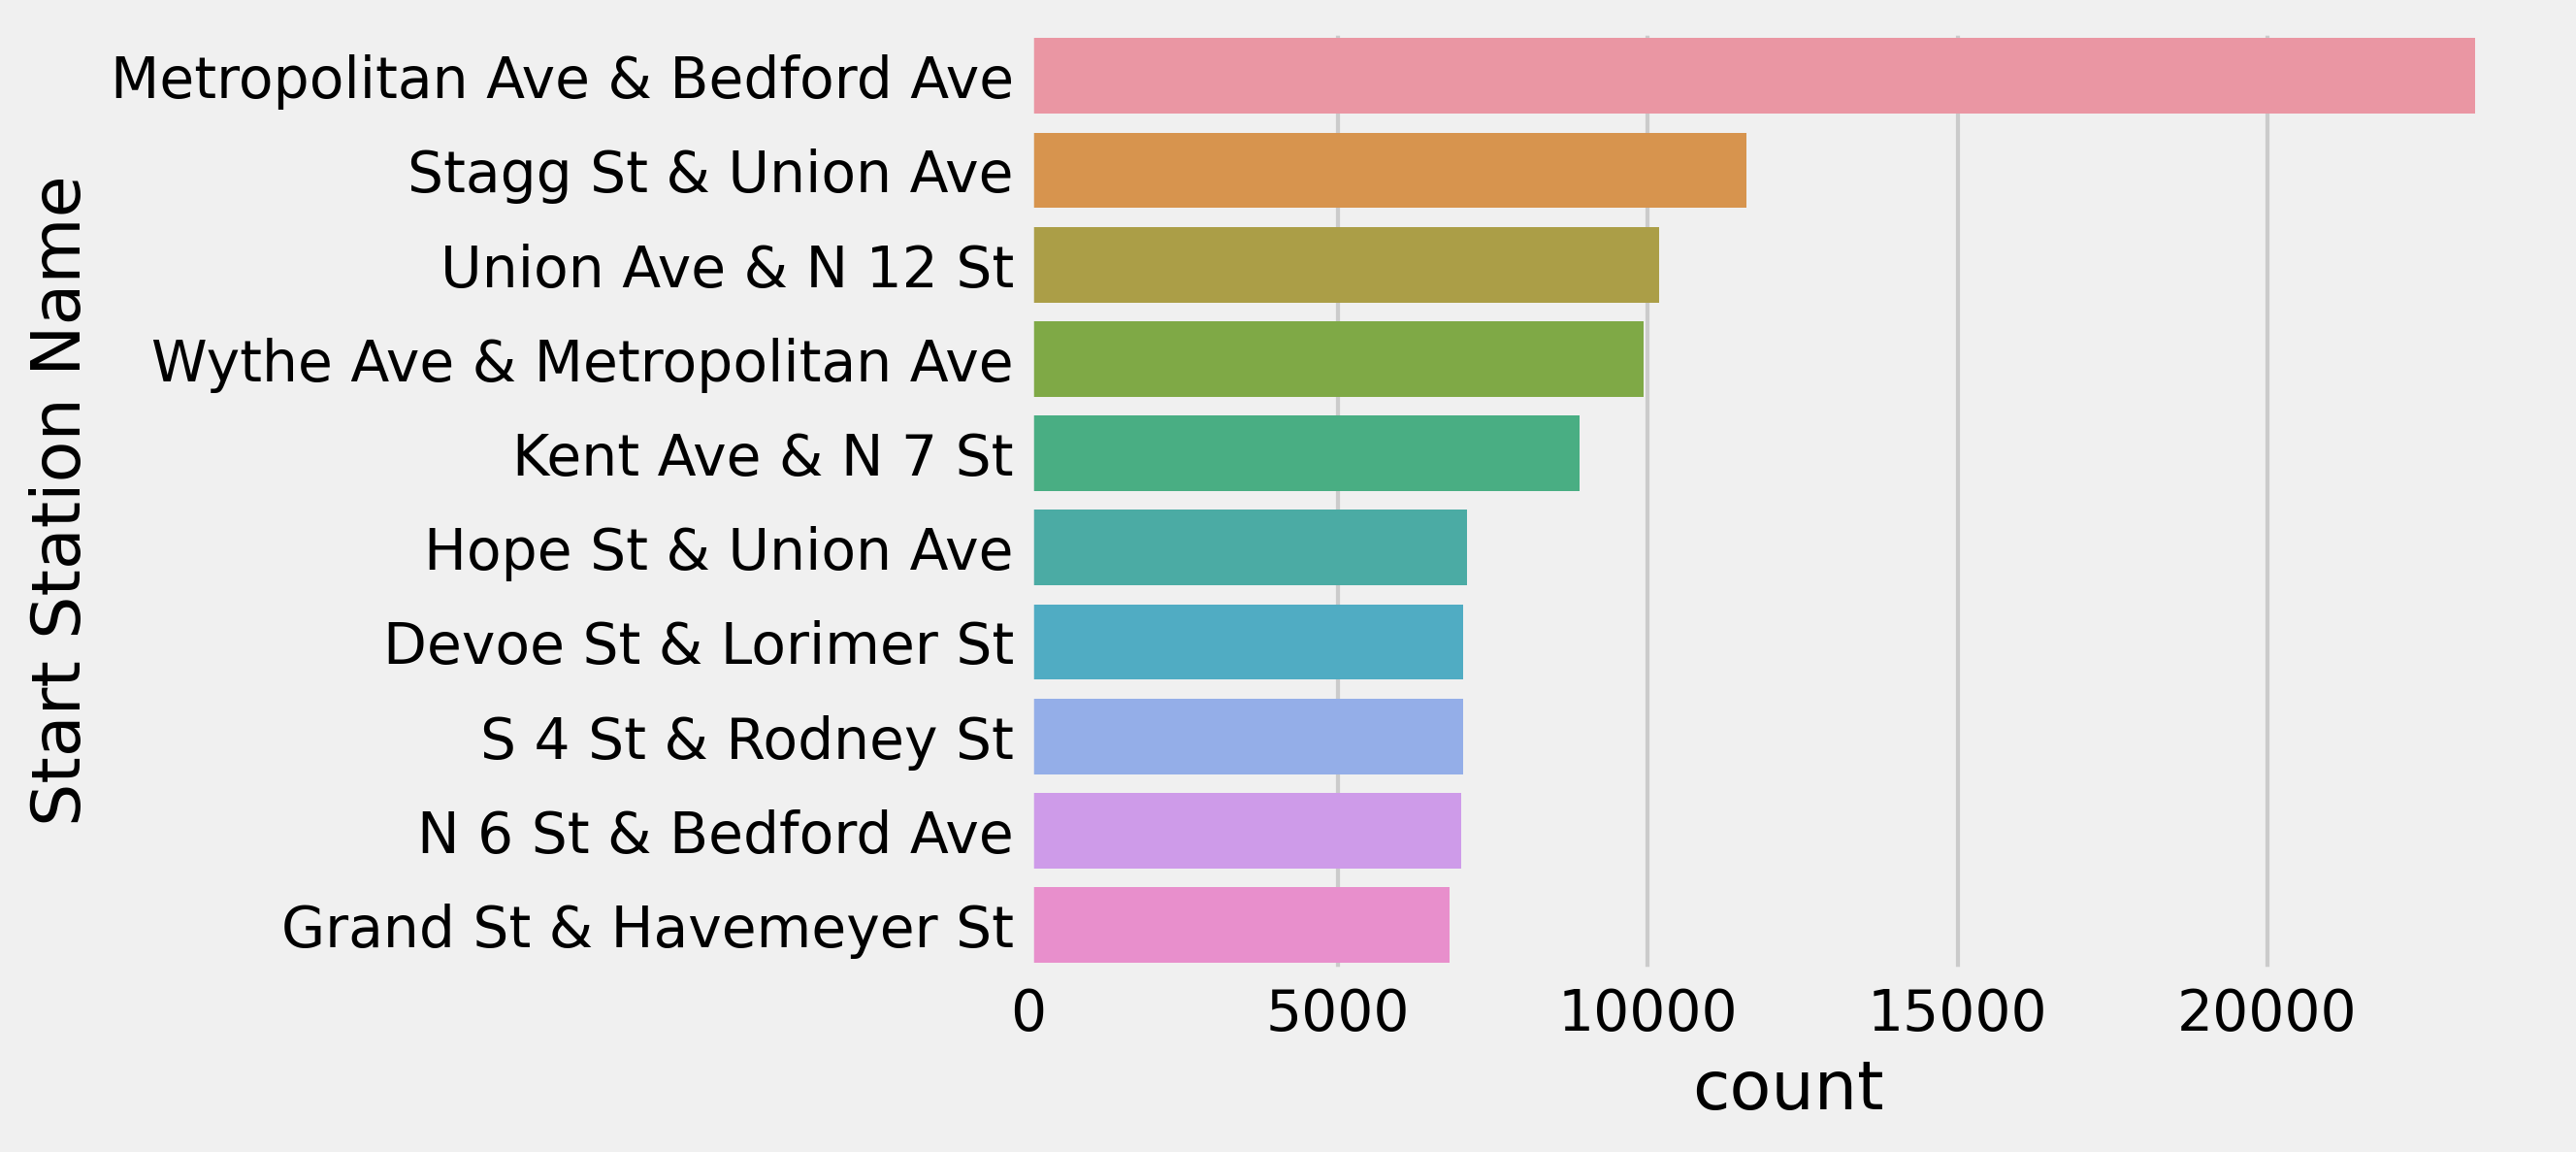

In [26]:
g = sns.countplot(y="Start Station Name", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['Start Station Name'].value_counts().iloc[:10].index)




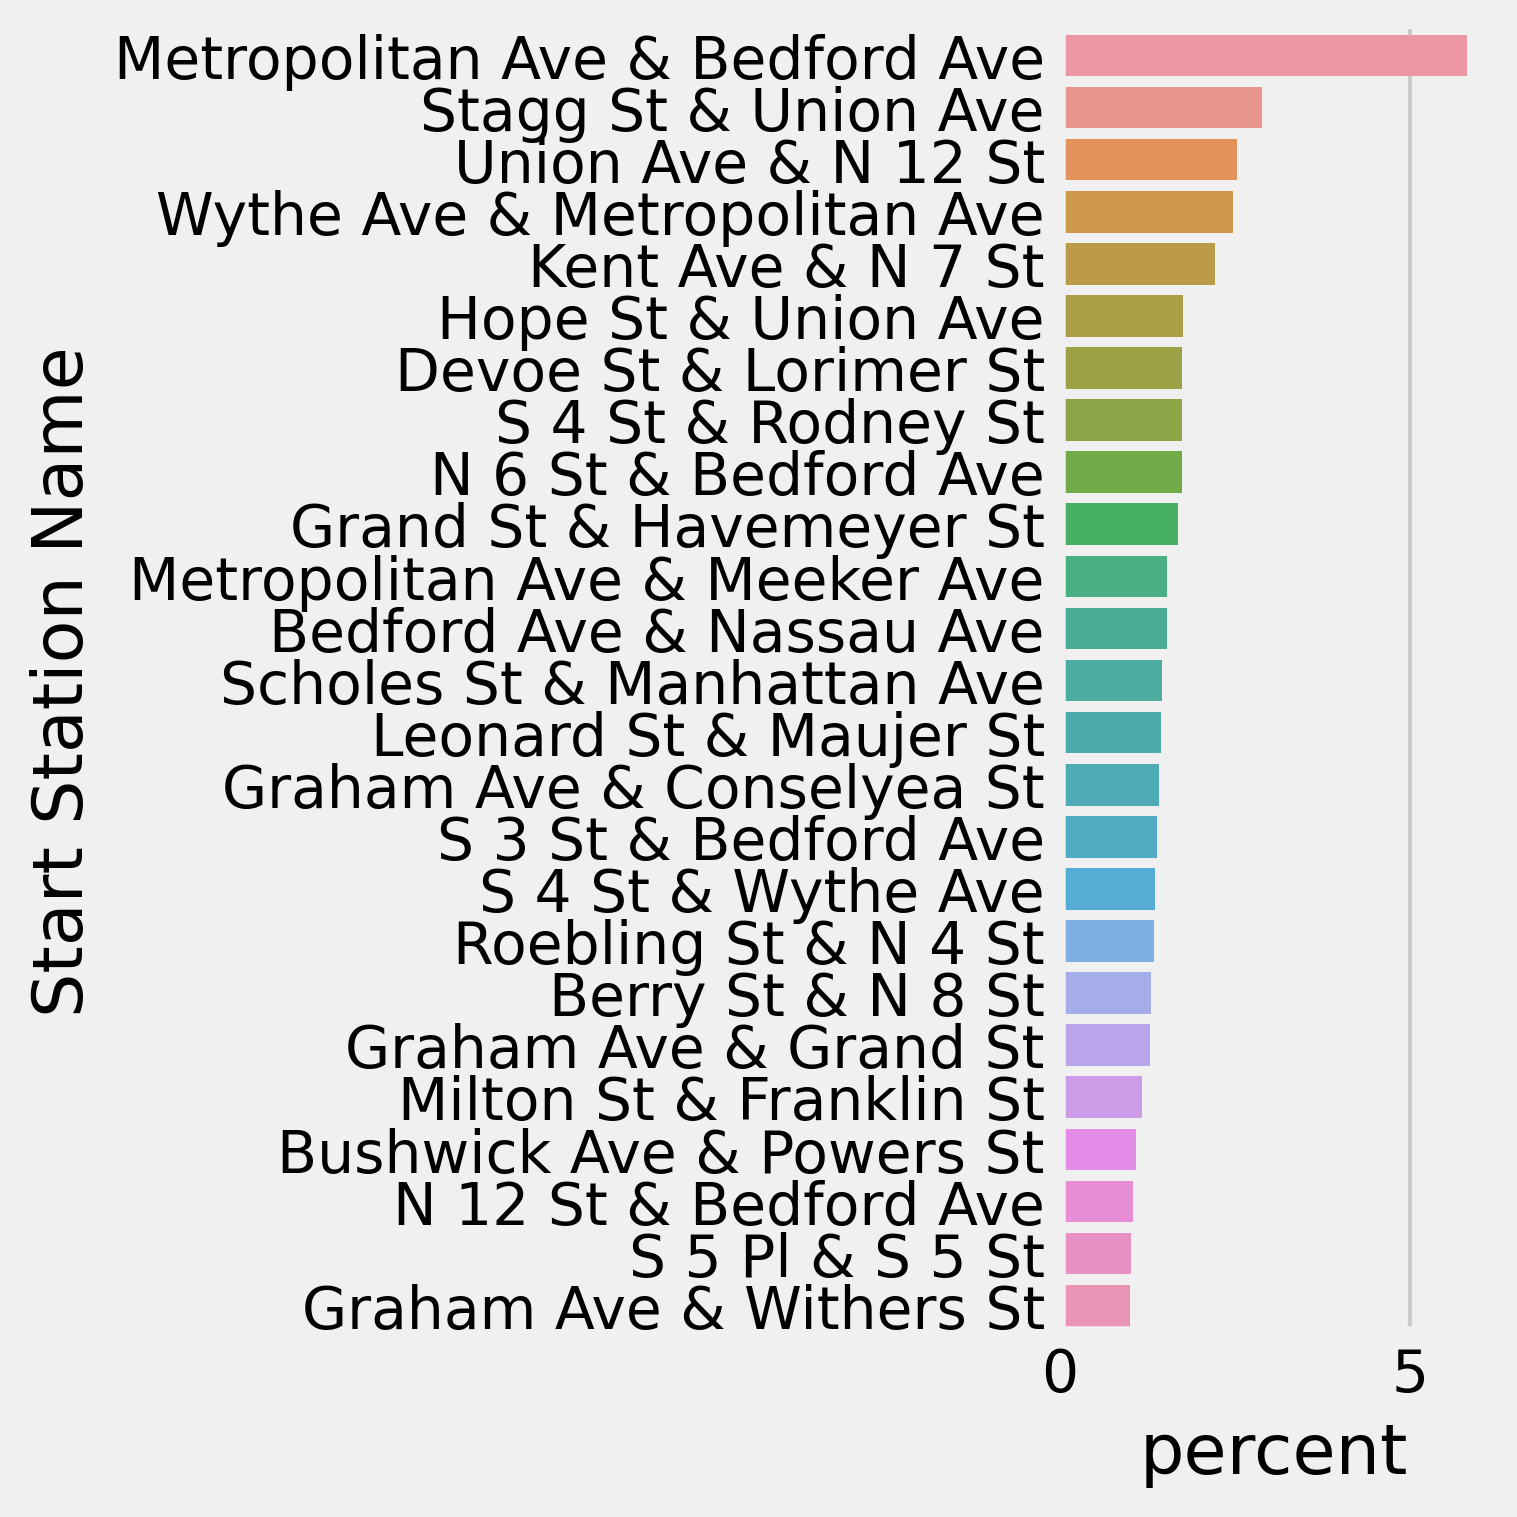

In [27]:
x,y = 'end_near','Start Station Name'

df = citi[citi[x]==1]

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='percent',y=y,kind='bar',data=df1[df1['percent']>1])

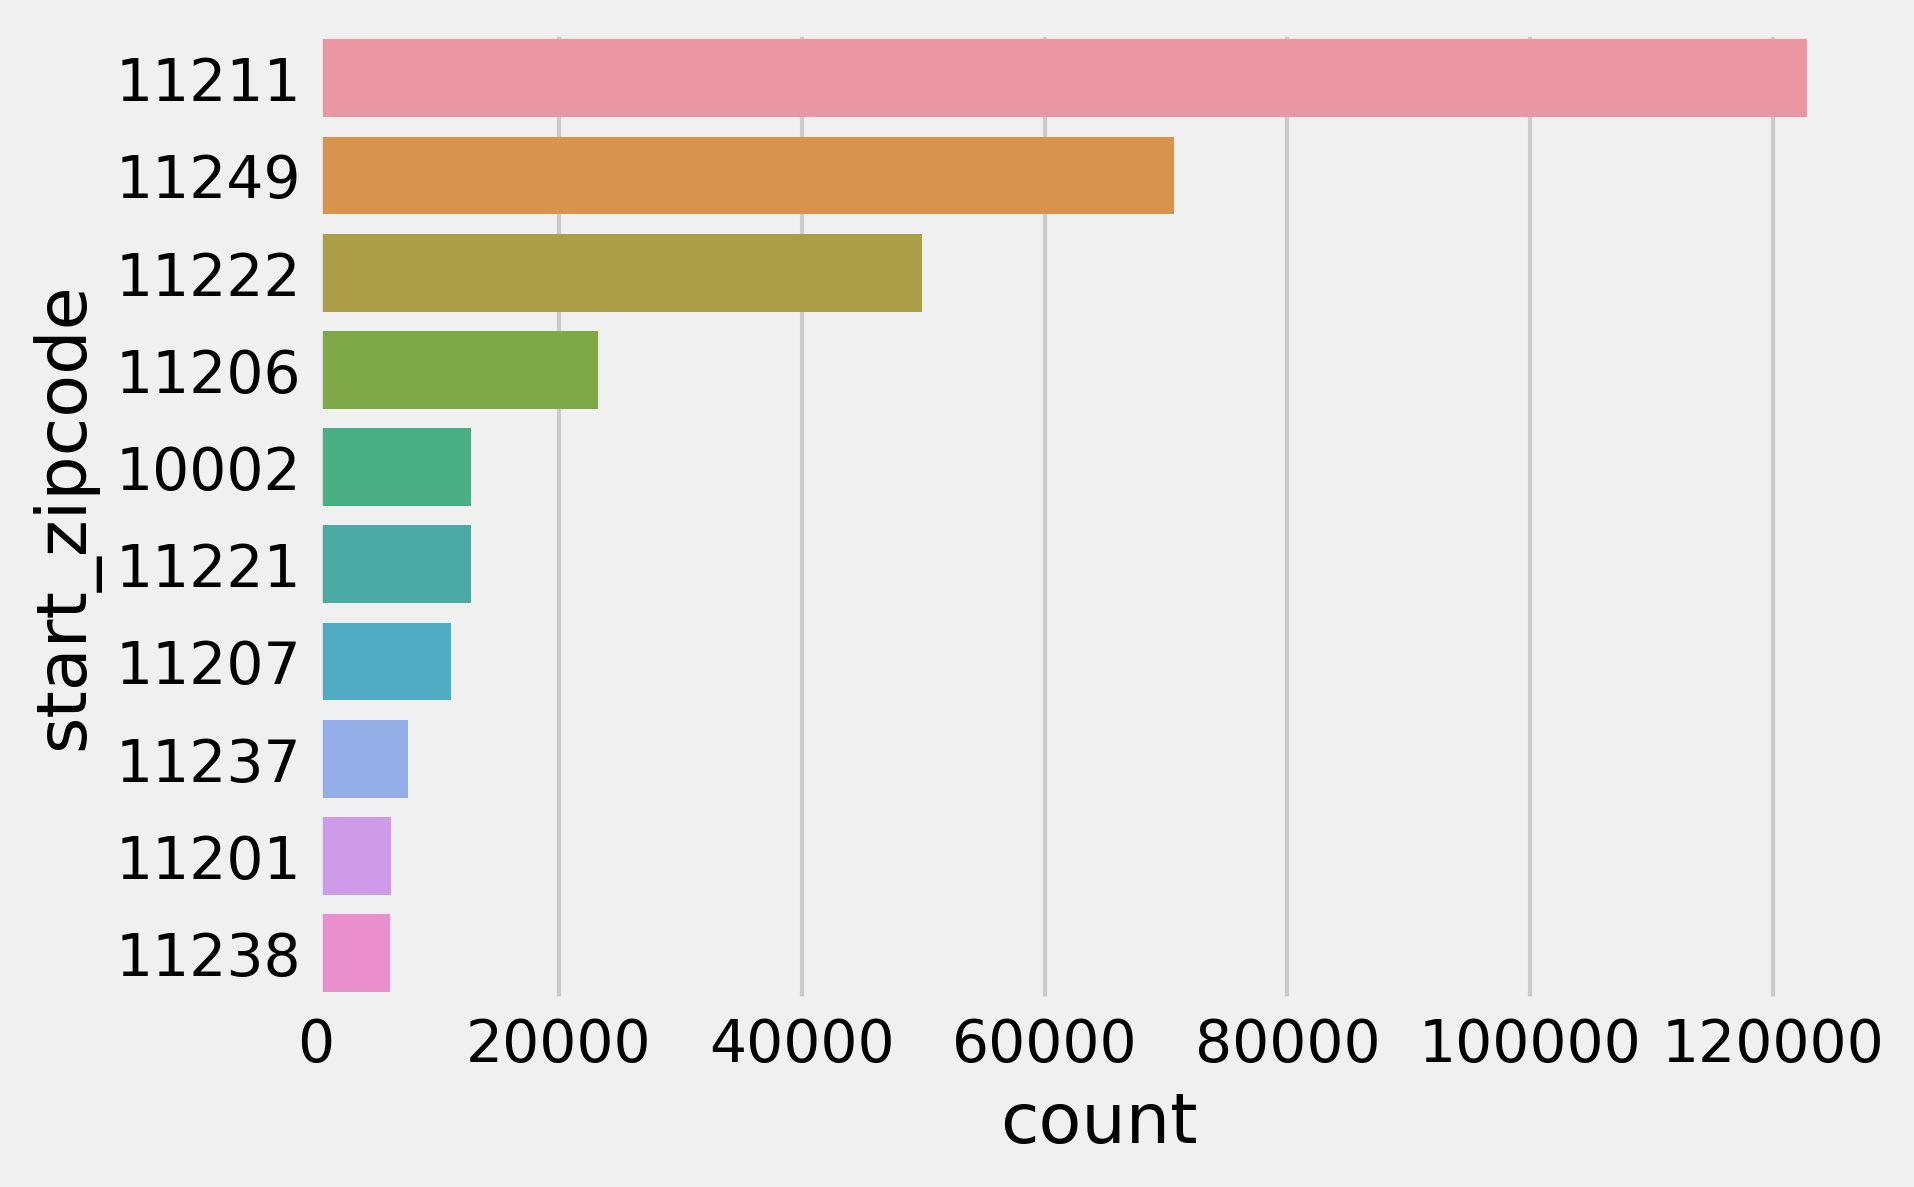

In [28]:
g = sns.countplot(y="start_zipcode", 
                  data=citi[citi['end_near']==1],
                  order = citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)



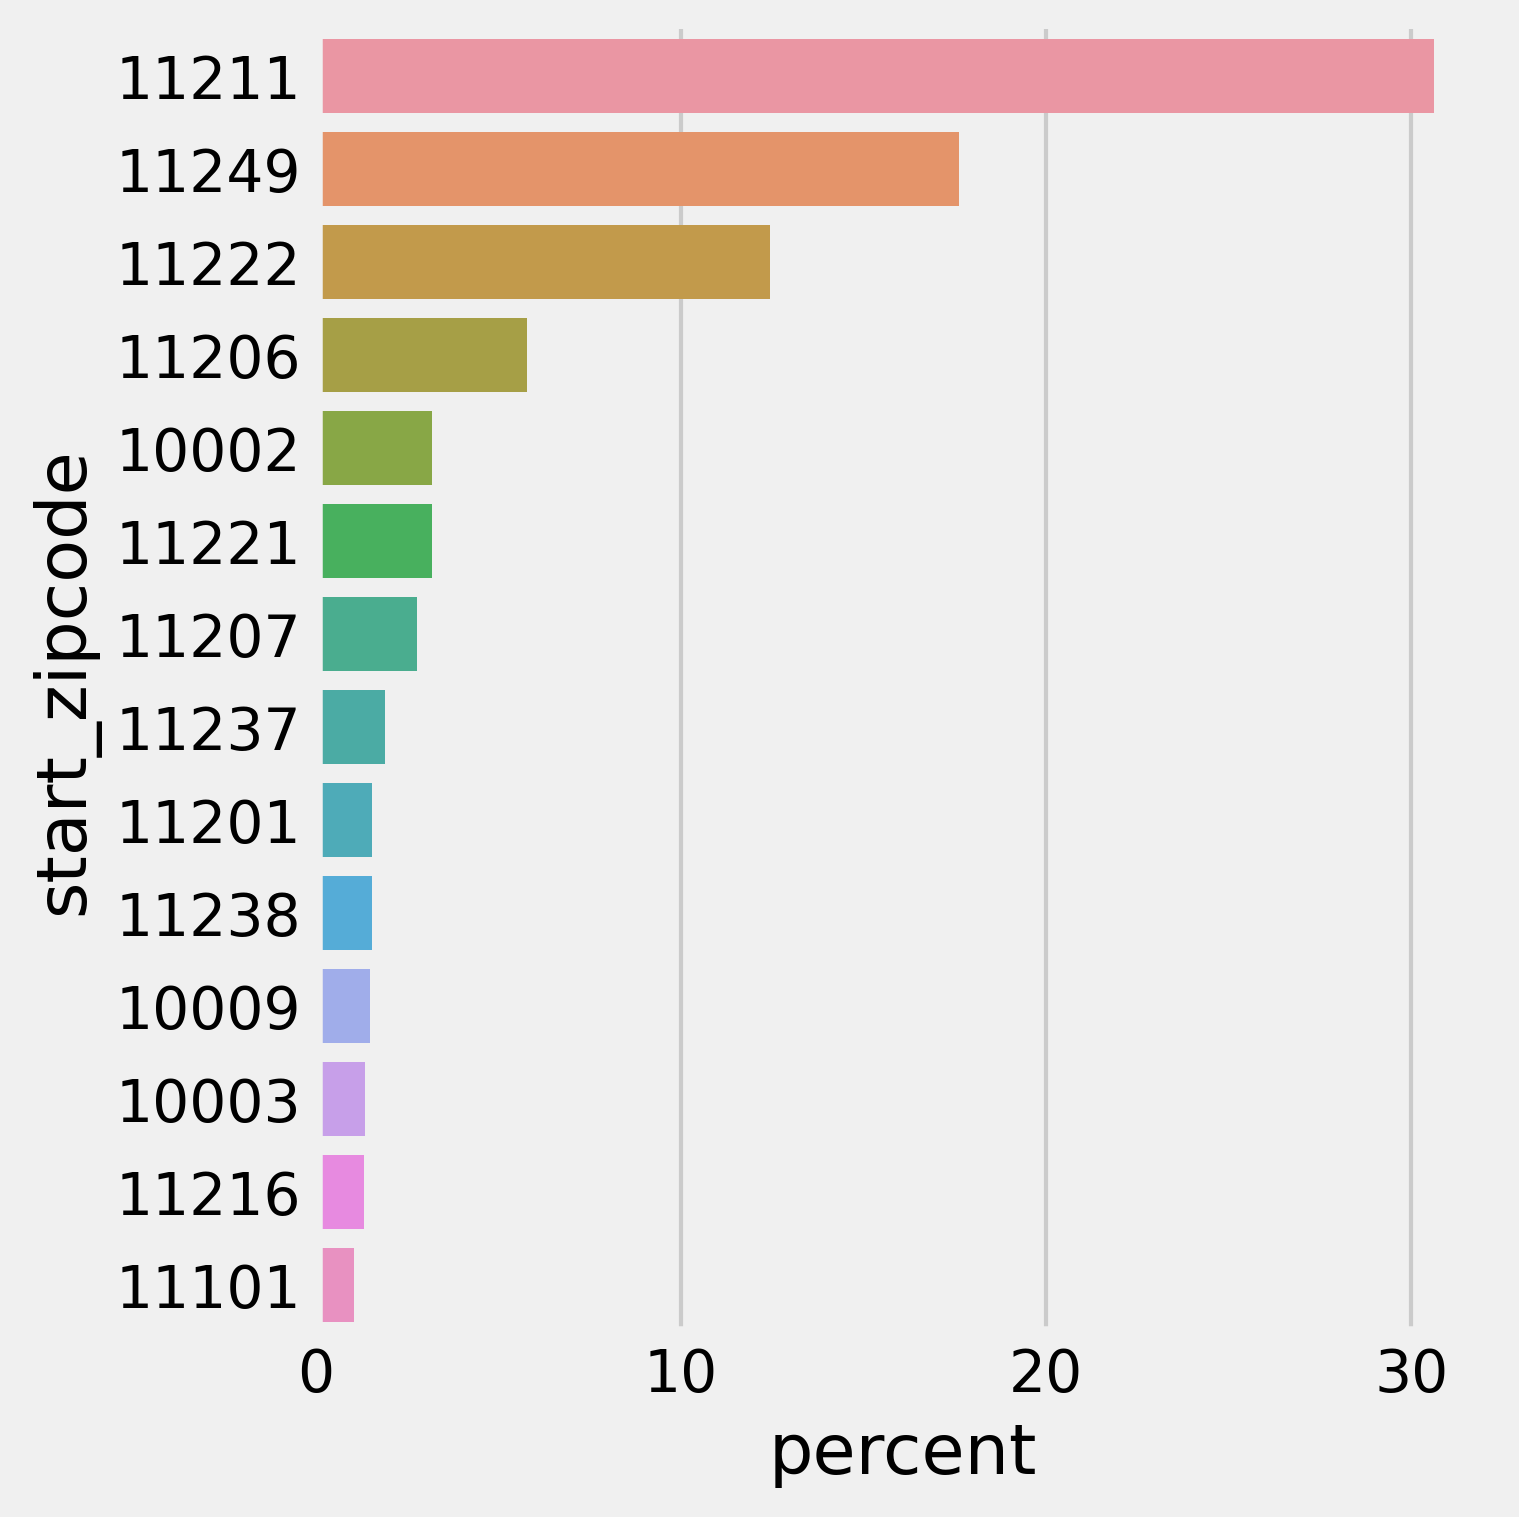

In [29]:
x,y = 'end_near','start_zipcode'

df = citi[citi[x]==1]

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='percent',y=y,kind='bar',data=df1[df1['percent']>1])

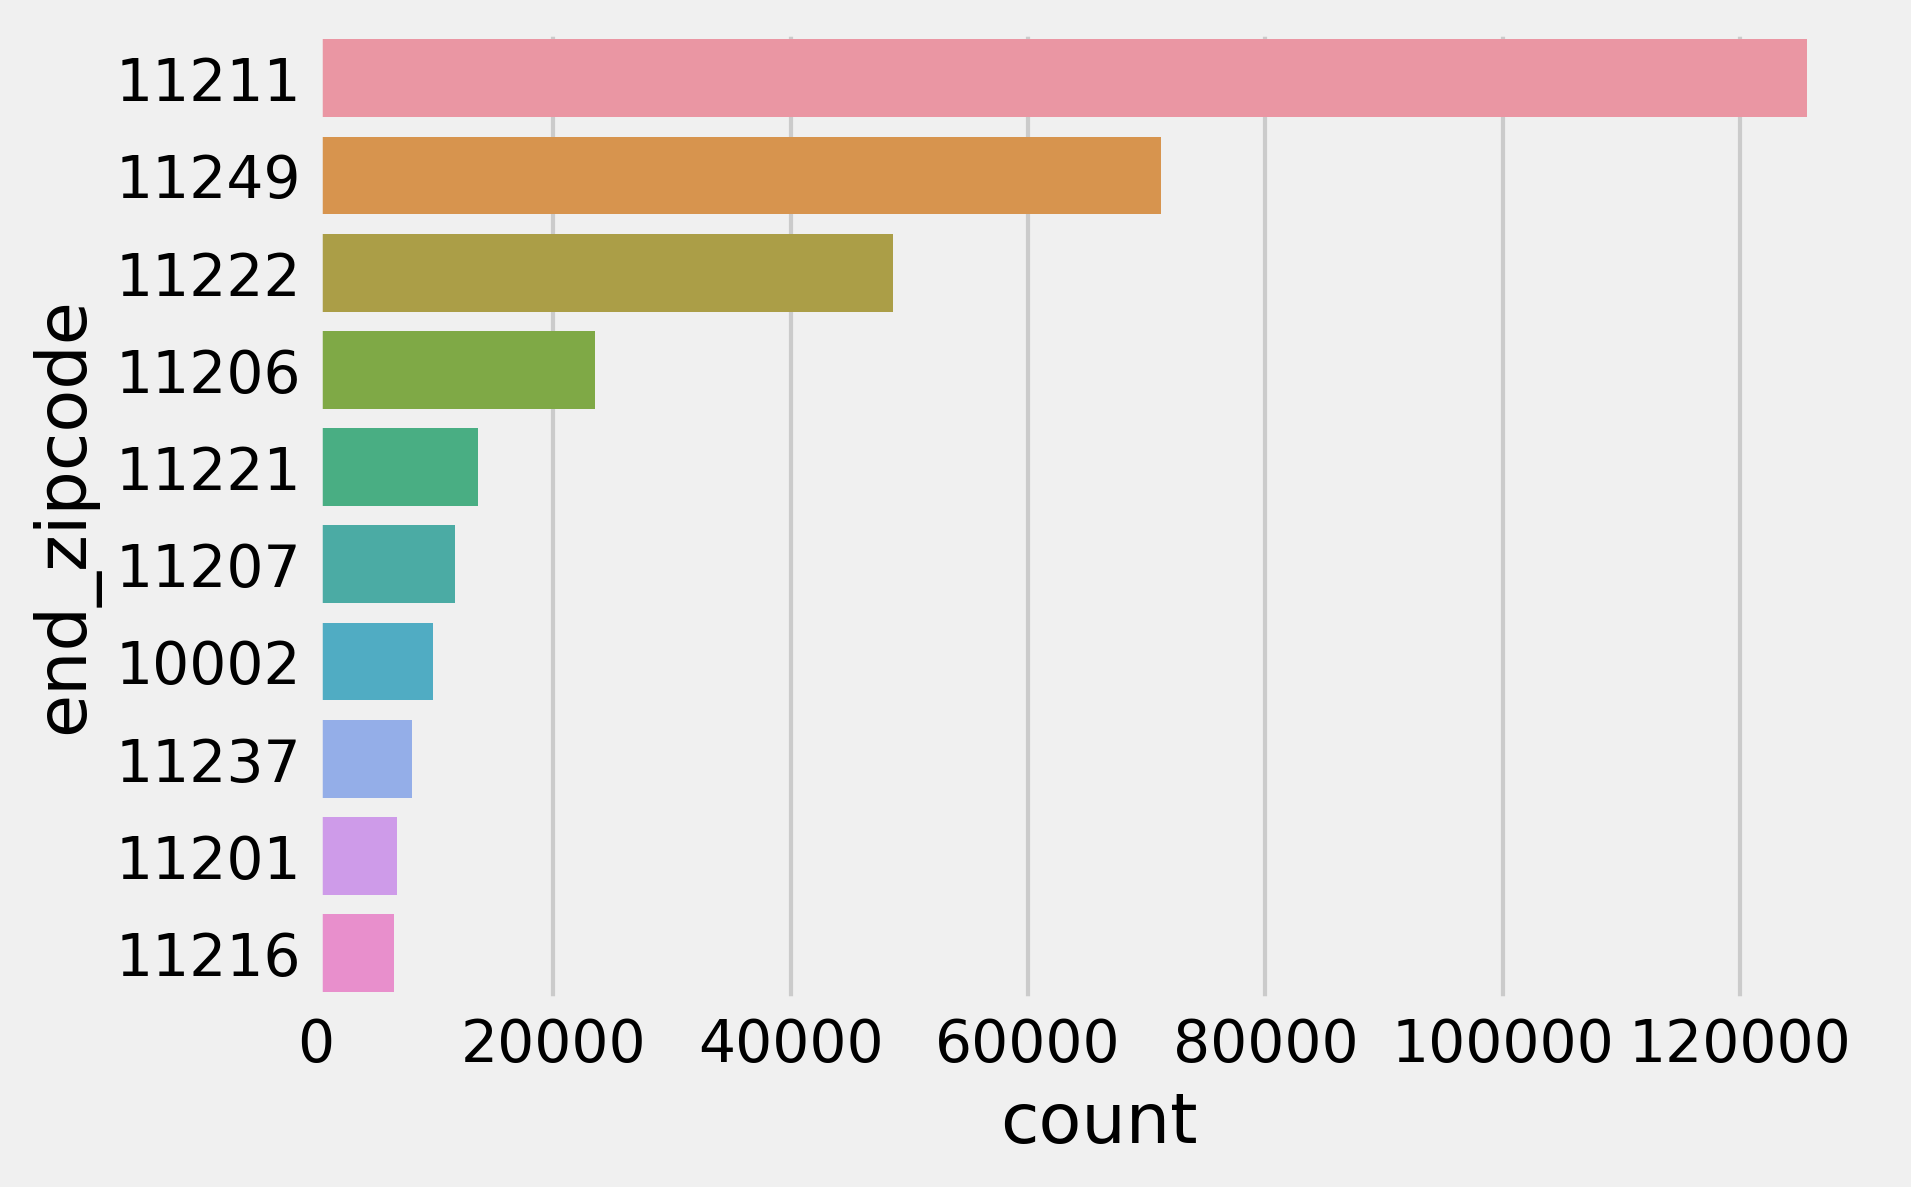

In [30]:
# color=['r','b','black','r','b','black','r','b','black','white']
g = sns.countplot(y="end_zipcode", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index,
#                   palette=color,
                  )


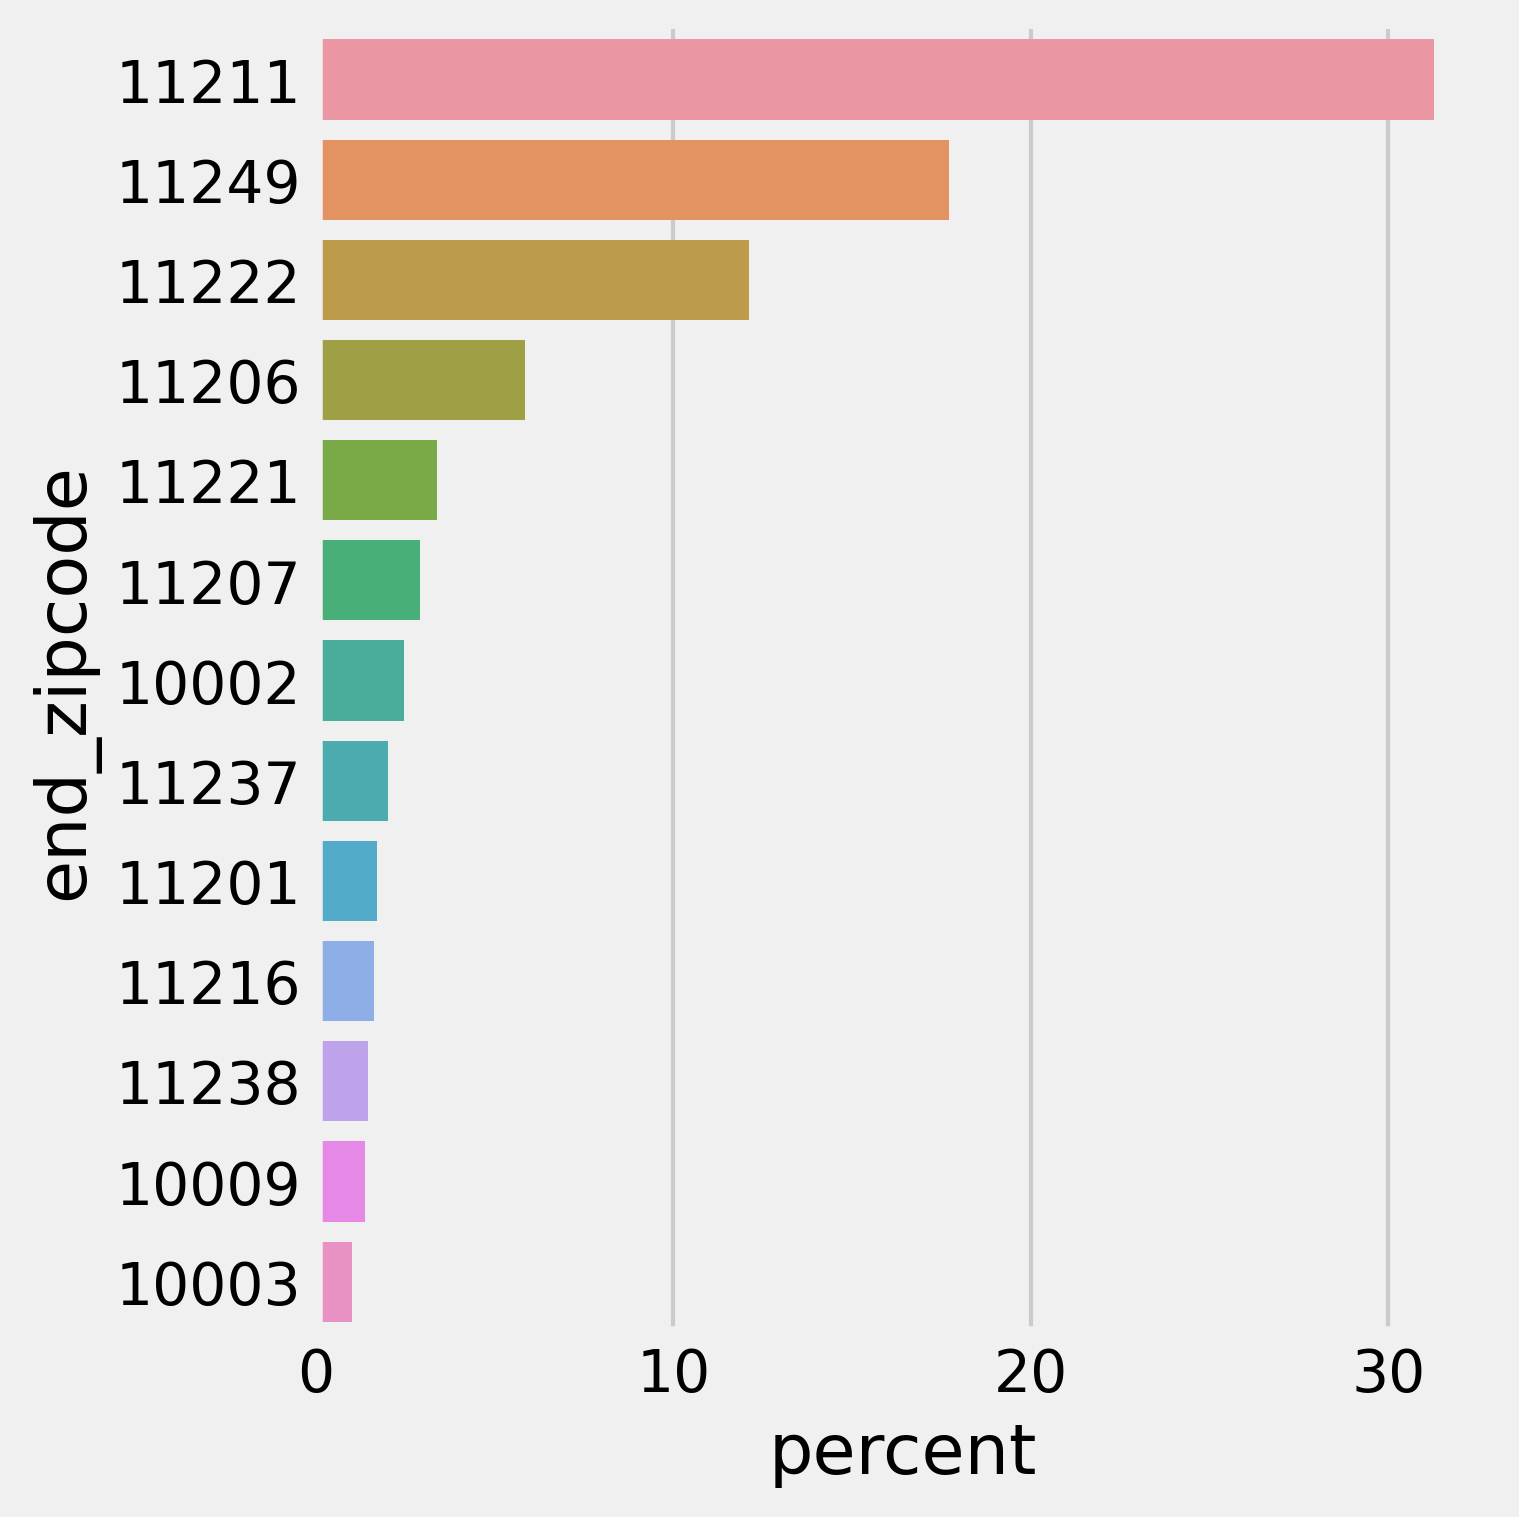

In [31]:
x,y = 'start_near','end_zipcode'

df = citi[citi[x]==1]

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x='percent',y=y,kind='bar',data=df1[df1['percent']>1])

In [32]:
citi['YearMonth'] = pd.to_datetime(citi['Start Time']).apply(lambda x: '{year}-{month}'.format(year=x.year, month=x.month))

citi_start_near = citi[citi['start_near']==1]
citi_end_near = citi[citi['end_near']==1]


In [33]:
citi.columns

Index(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type',
       'Birth Year', 'Gender', 'start_near', 'end_near', 'both_near',
       'end_zipcode', 'start_zipcode', 'YearMonth'],
      dtype='object')

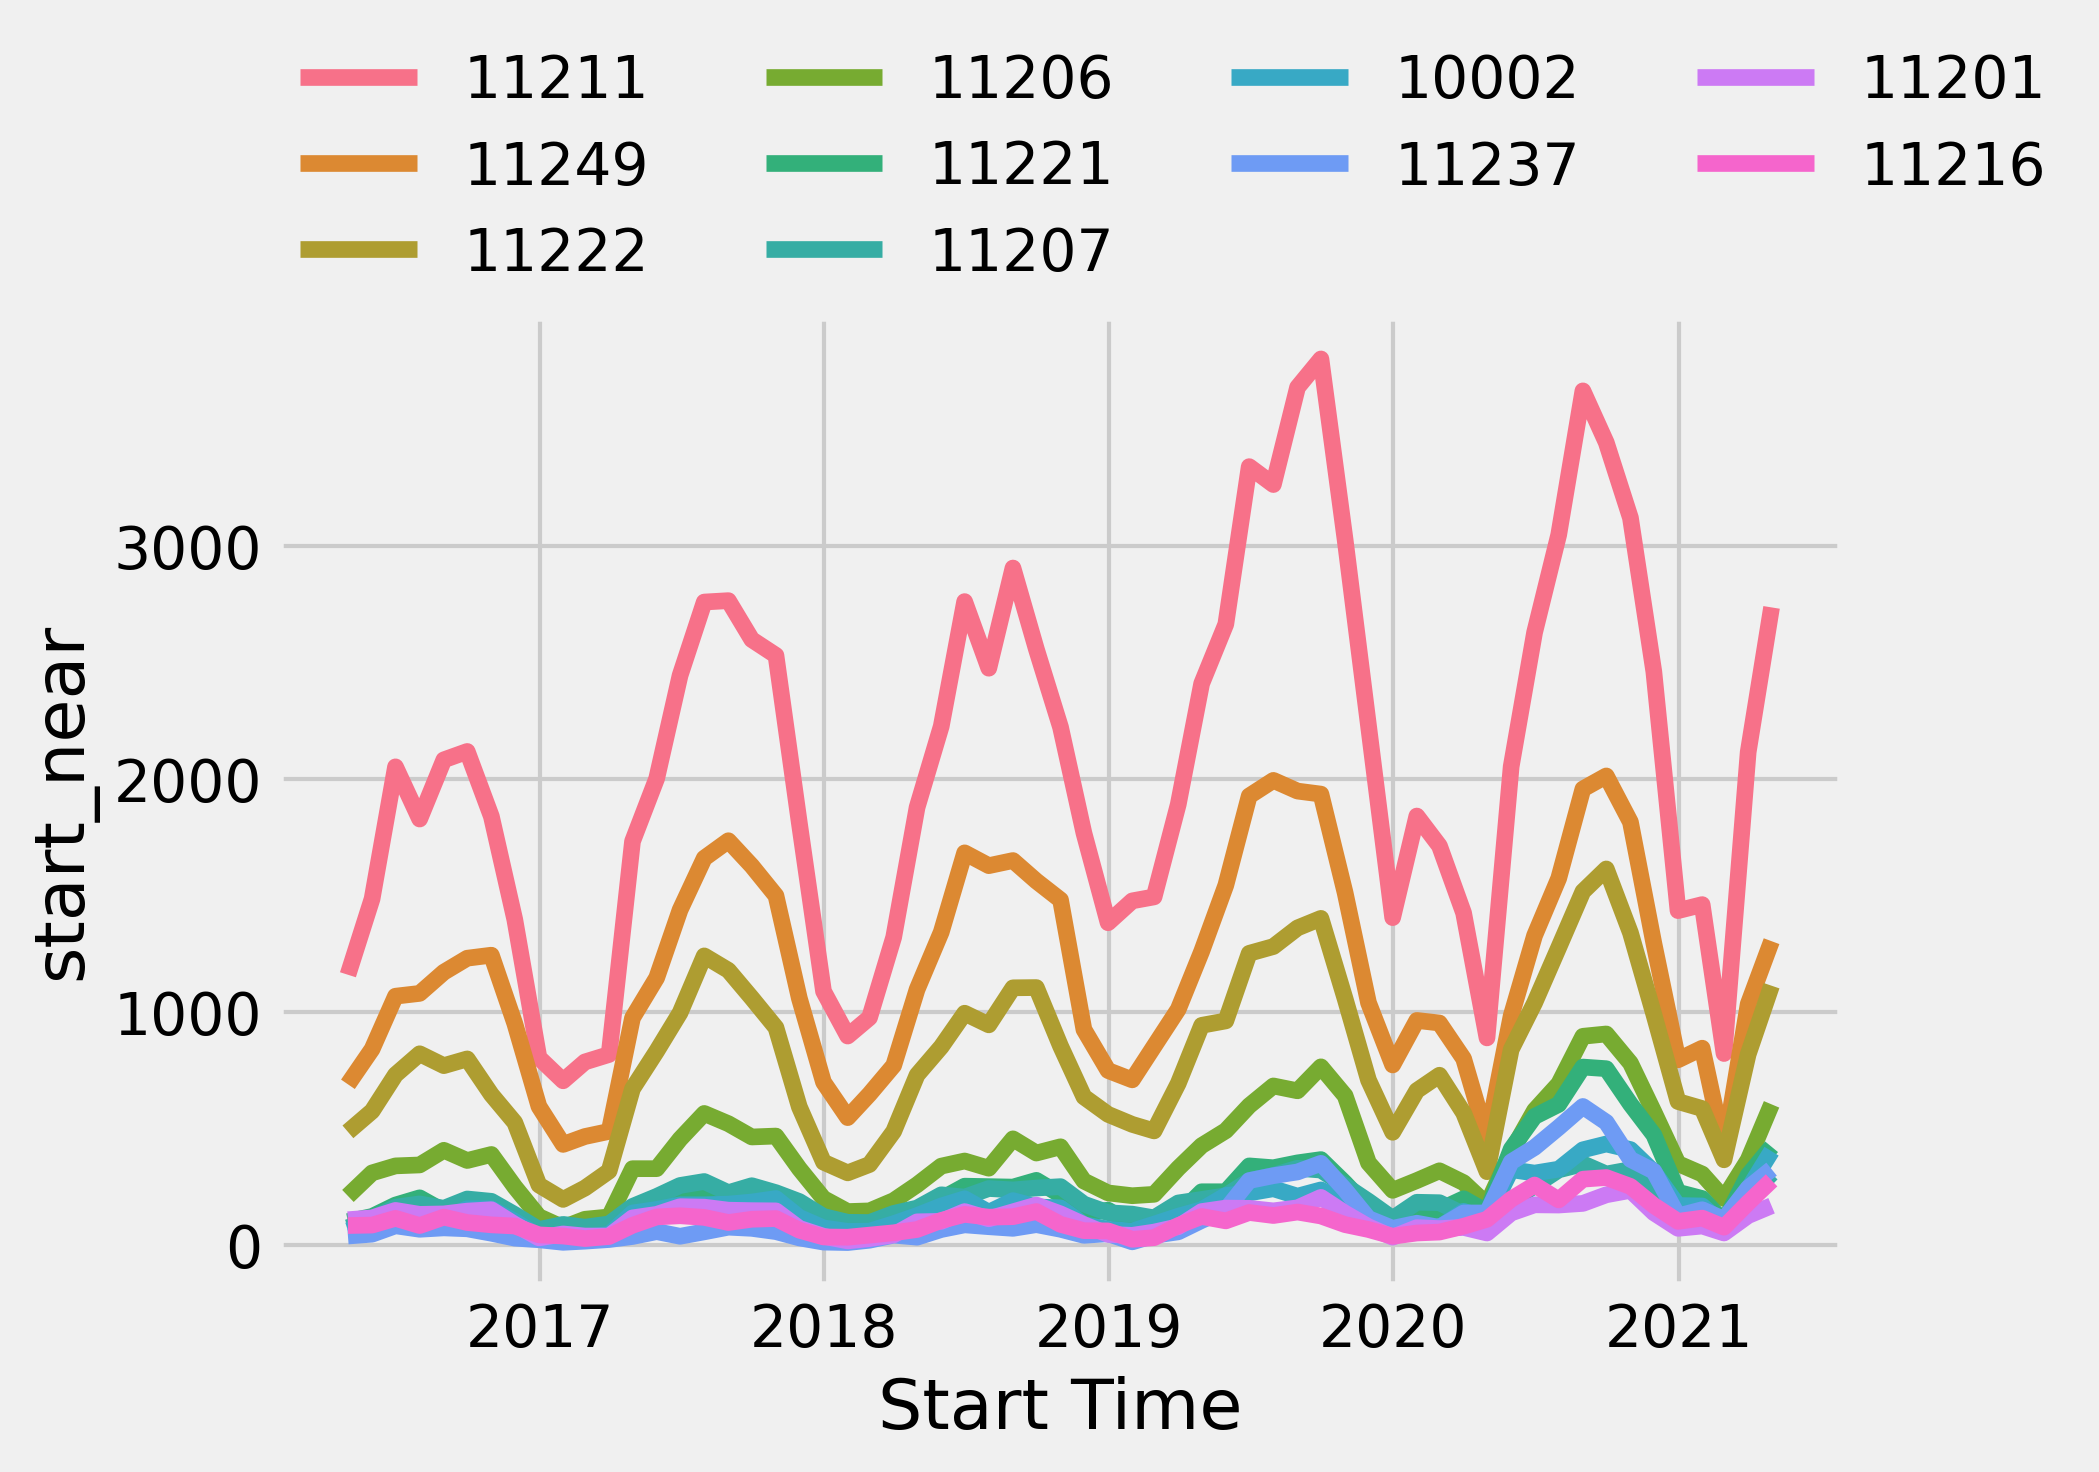

In [164]:
end_zipcode_10 = list(citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index)

data_all = []
for zipcode in end_zipcode_10:
    data = pd.DataFrame(citi_start_near[citi_start_near['end_zipcode']==zipcode].resample(rule='M', on='Start Time')['start_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)

df = pd.concat(data_all, axis=0)

fig, ax = plt.subplots()
g = sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode',ax=ax)

ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
            borderaxespad=0, frameon=False)

(18383.0, 18567.0)

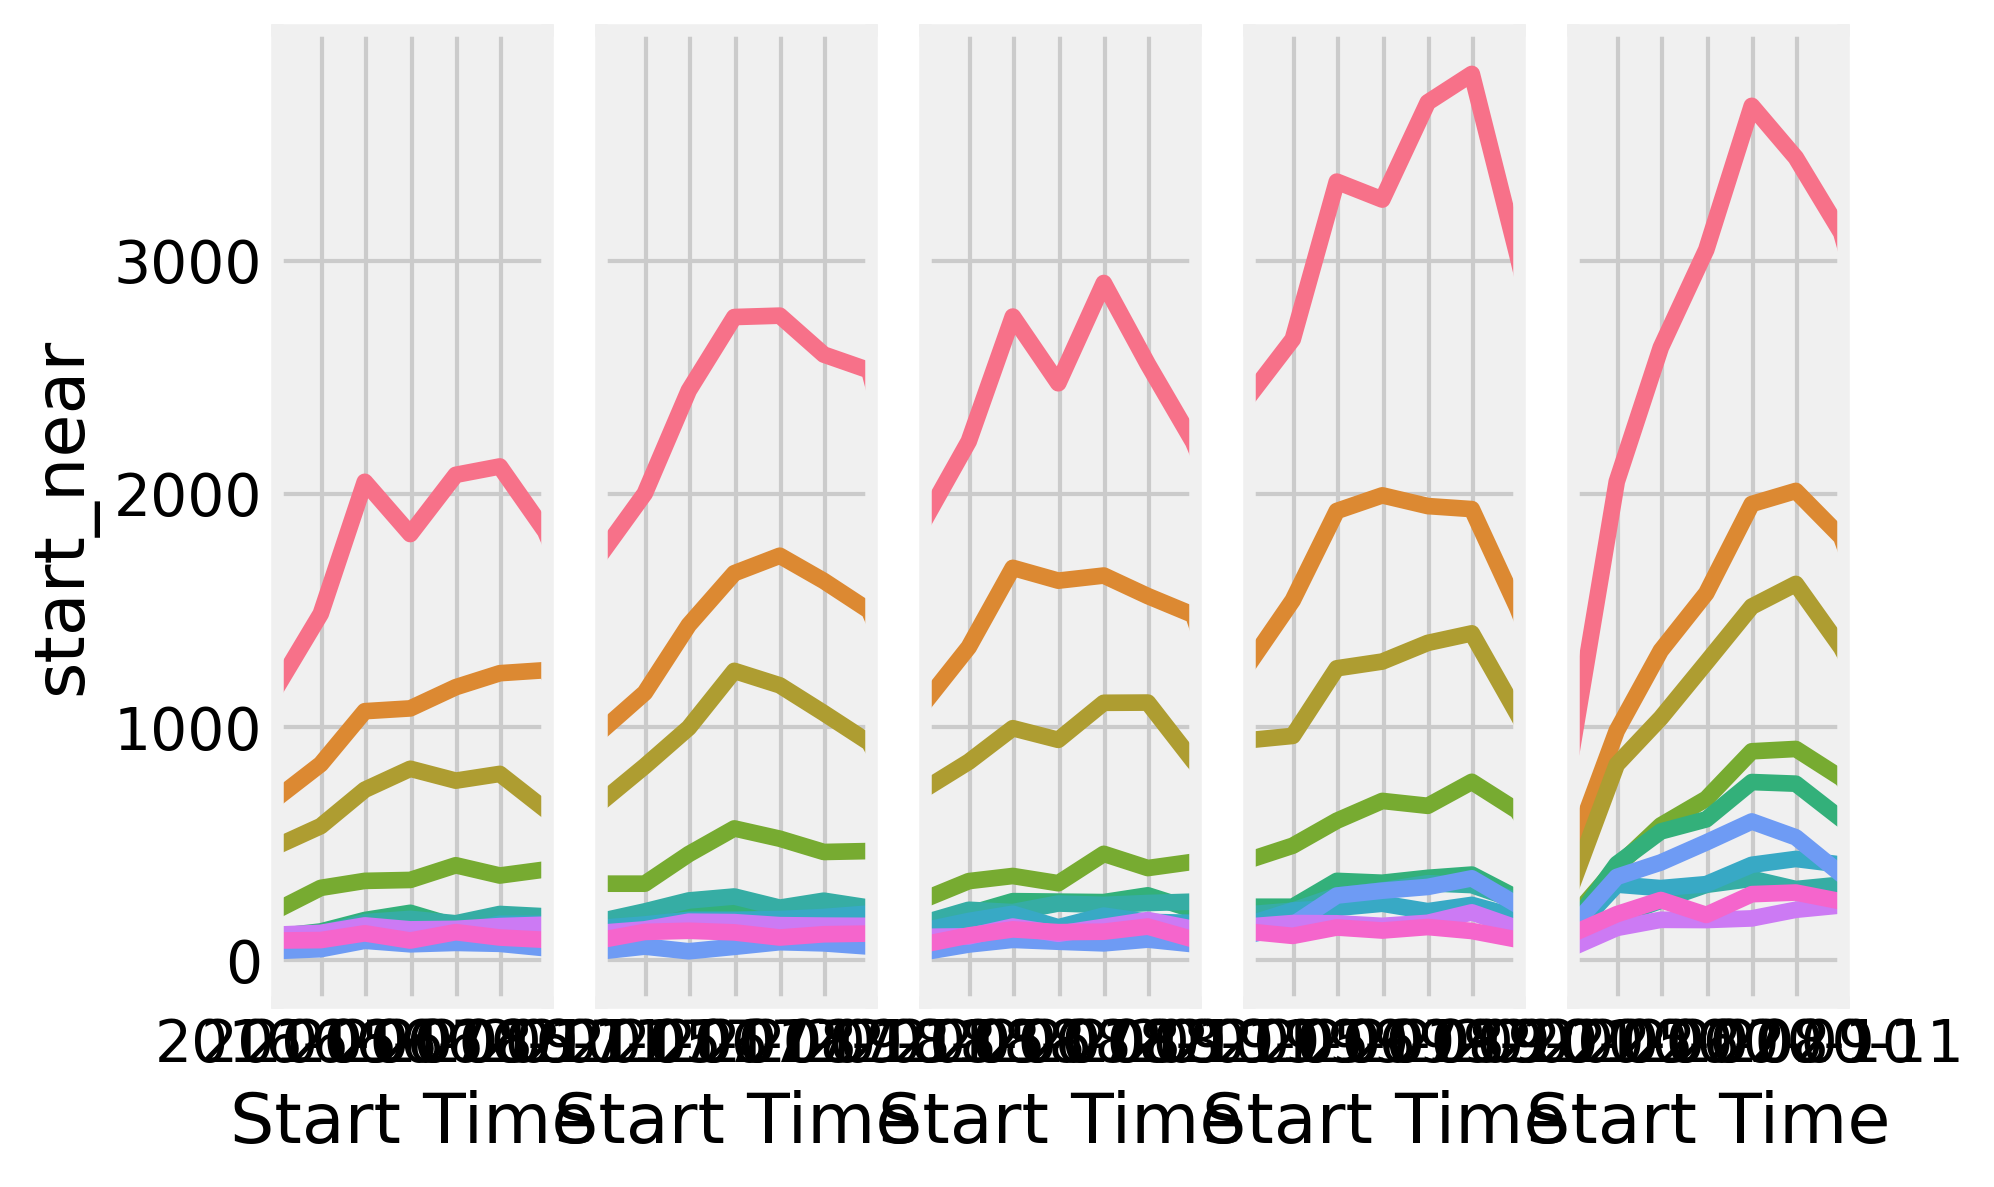

In [169]:
f,axs = plt.subplots(1,5,sharey=True, facecolor='w')
g = sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode', legend=False,
                 ax=axs[0])
axs[0].set_xlim(date(2016, 5, 1),
                date(2016, 11, 1))
g2 = sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode',legend=False,
                  ax=axs[1])
axs[1].set_xlim(date(2017, 5, 1),
                date(2017, 11, 1))
g3= sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode',legend=False,
                  ax=axs[2])
axs[2].set_xlim(date(2018, 5, 1),
                date(2018, 11, 1))
g4 = sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode',legend=False,
                  ax=axs[3])
axs[3].set_xlim(date(2019, 5, 1),
                date(2019, 11, 1))
g5 = sns.lineplot(data=df, 
                 x="Start Time", y="start_near",
                 hue='zipcode',legend=False,
                  ax=axs[4])
axs[4].set_xlim(date(2020, 5, 1),
                date(2020, 11, 1))

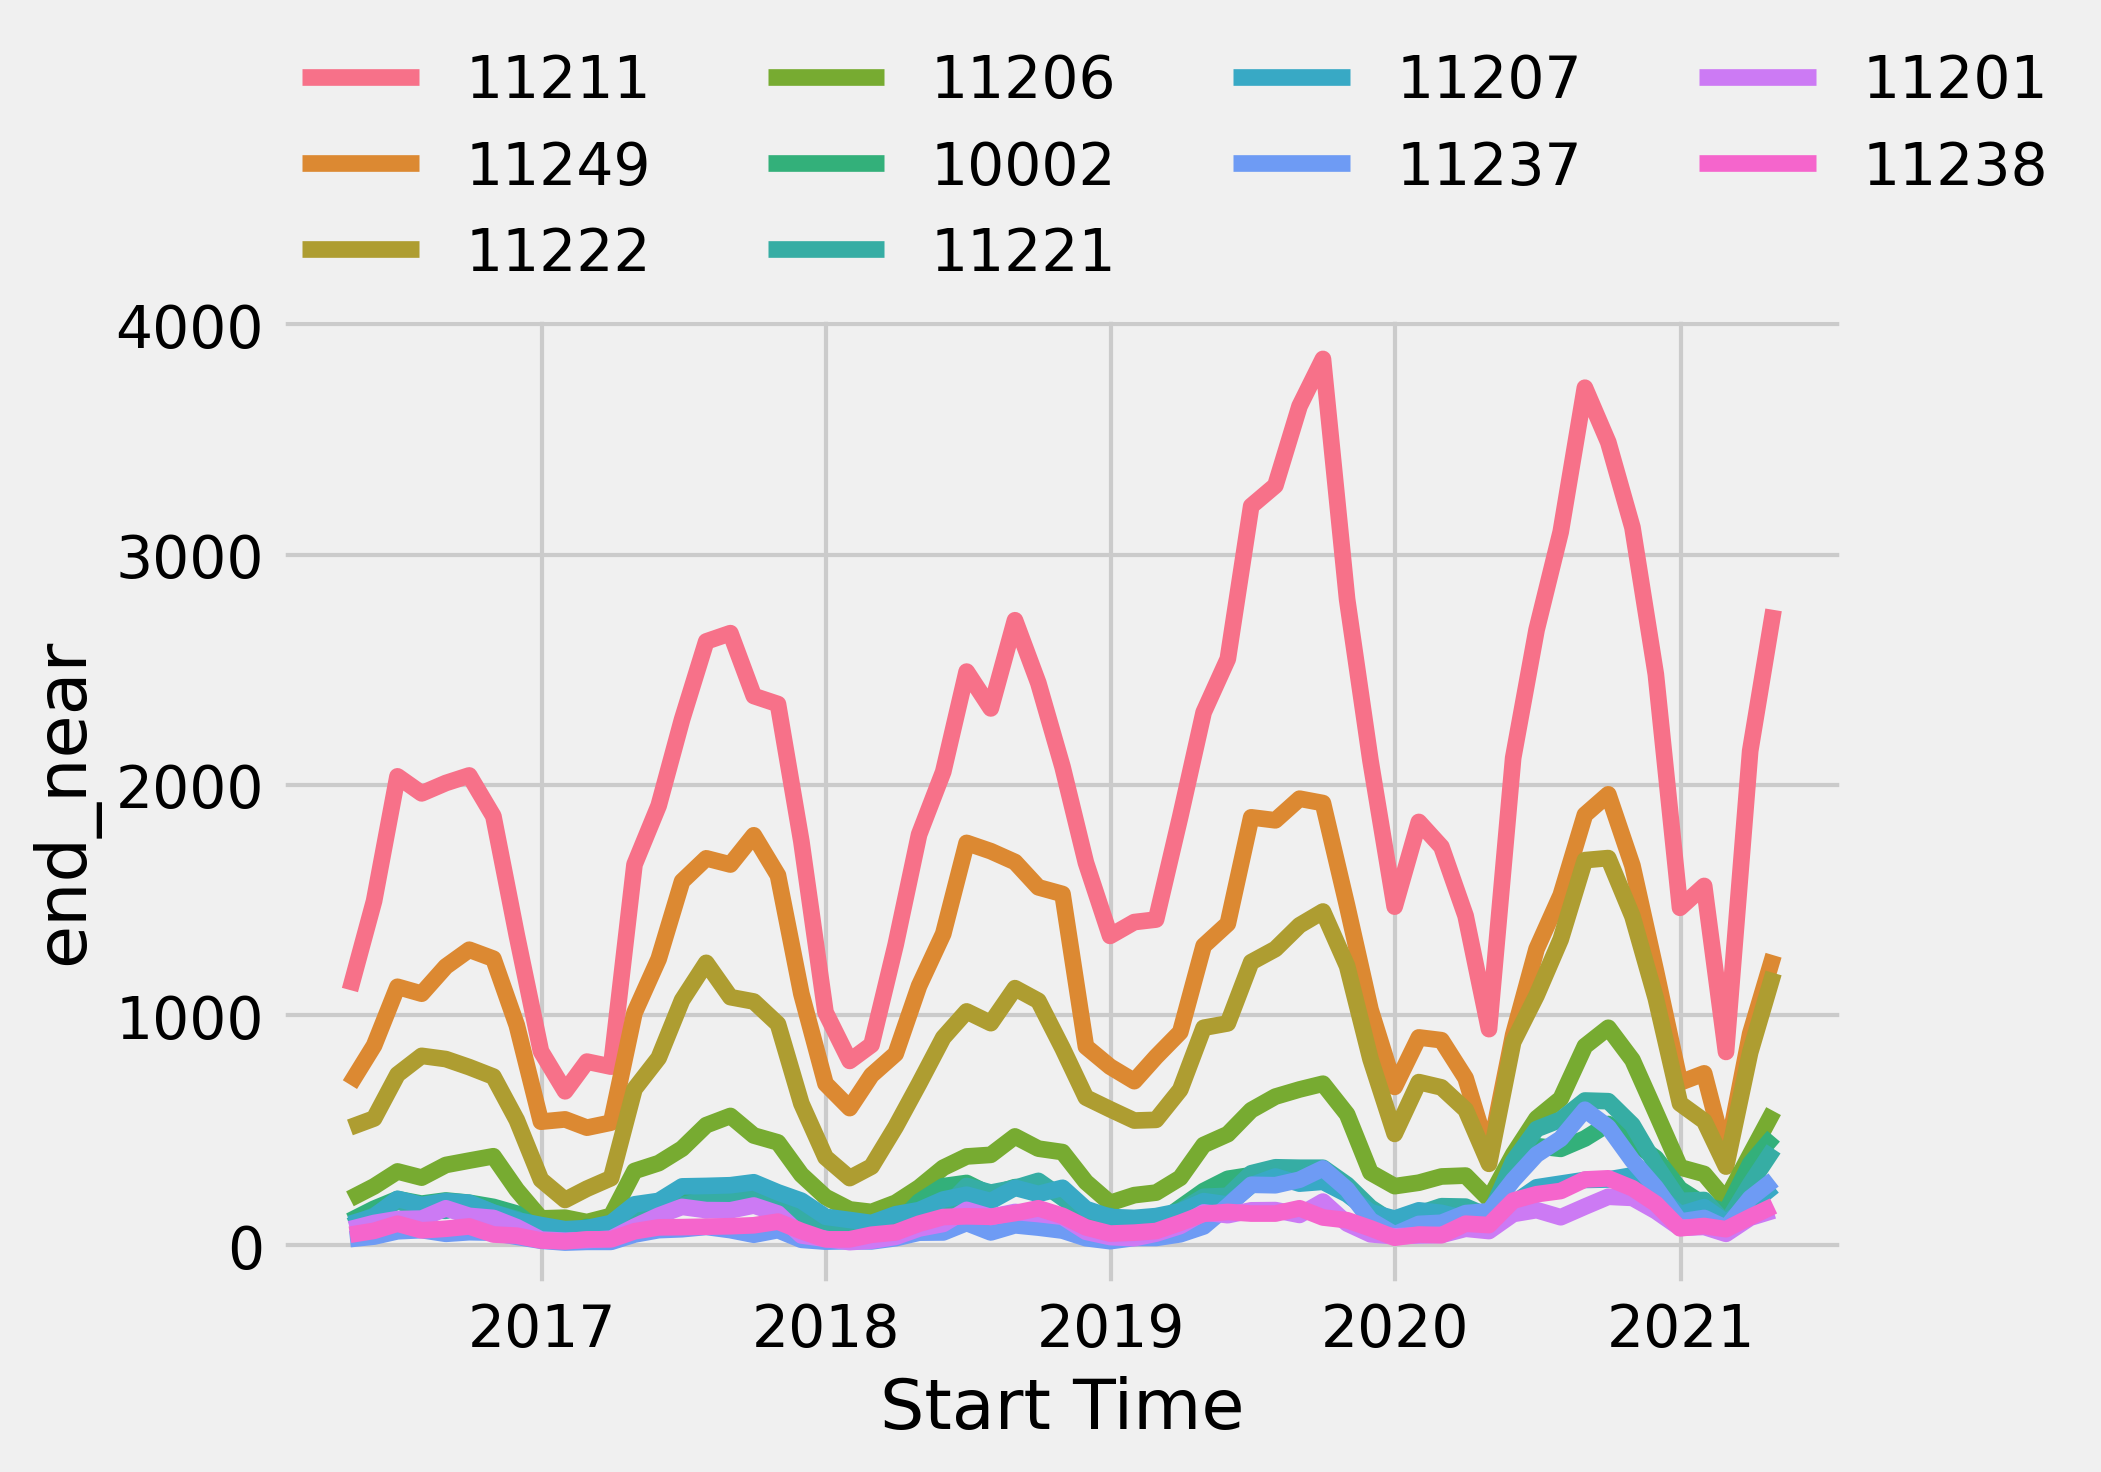

In [35]:

start_zipcode_10 = list(citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)
data_all = []
for zipcode in start_zipcode_10:
    data = pd.DataFrame(citi_end_near[citi_end_near['start_zipcode']==zipcode].resample(rule='M', on='Start Time')['end_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)

df = pd.concat(data_all, axis=0)

fig, ax = plt.subplots()
g = sns.lineplot(data=df, x="Start Time", y="end_near",hue='zipcode',ax=ax)

ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
            borderaxespad=0, frameon=False)

In [36]:
citi.loc[0,'Start Time'].hour

0

In [37]:
data = pd.DataFrame(citi_end_near[citi_end_near['start_zipcode']==zipcode].resample(rule='M', on='Start Time')['end_near'].sum())

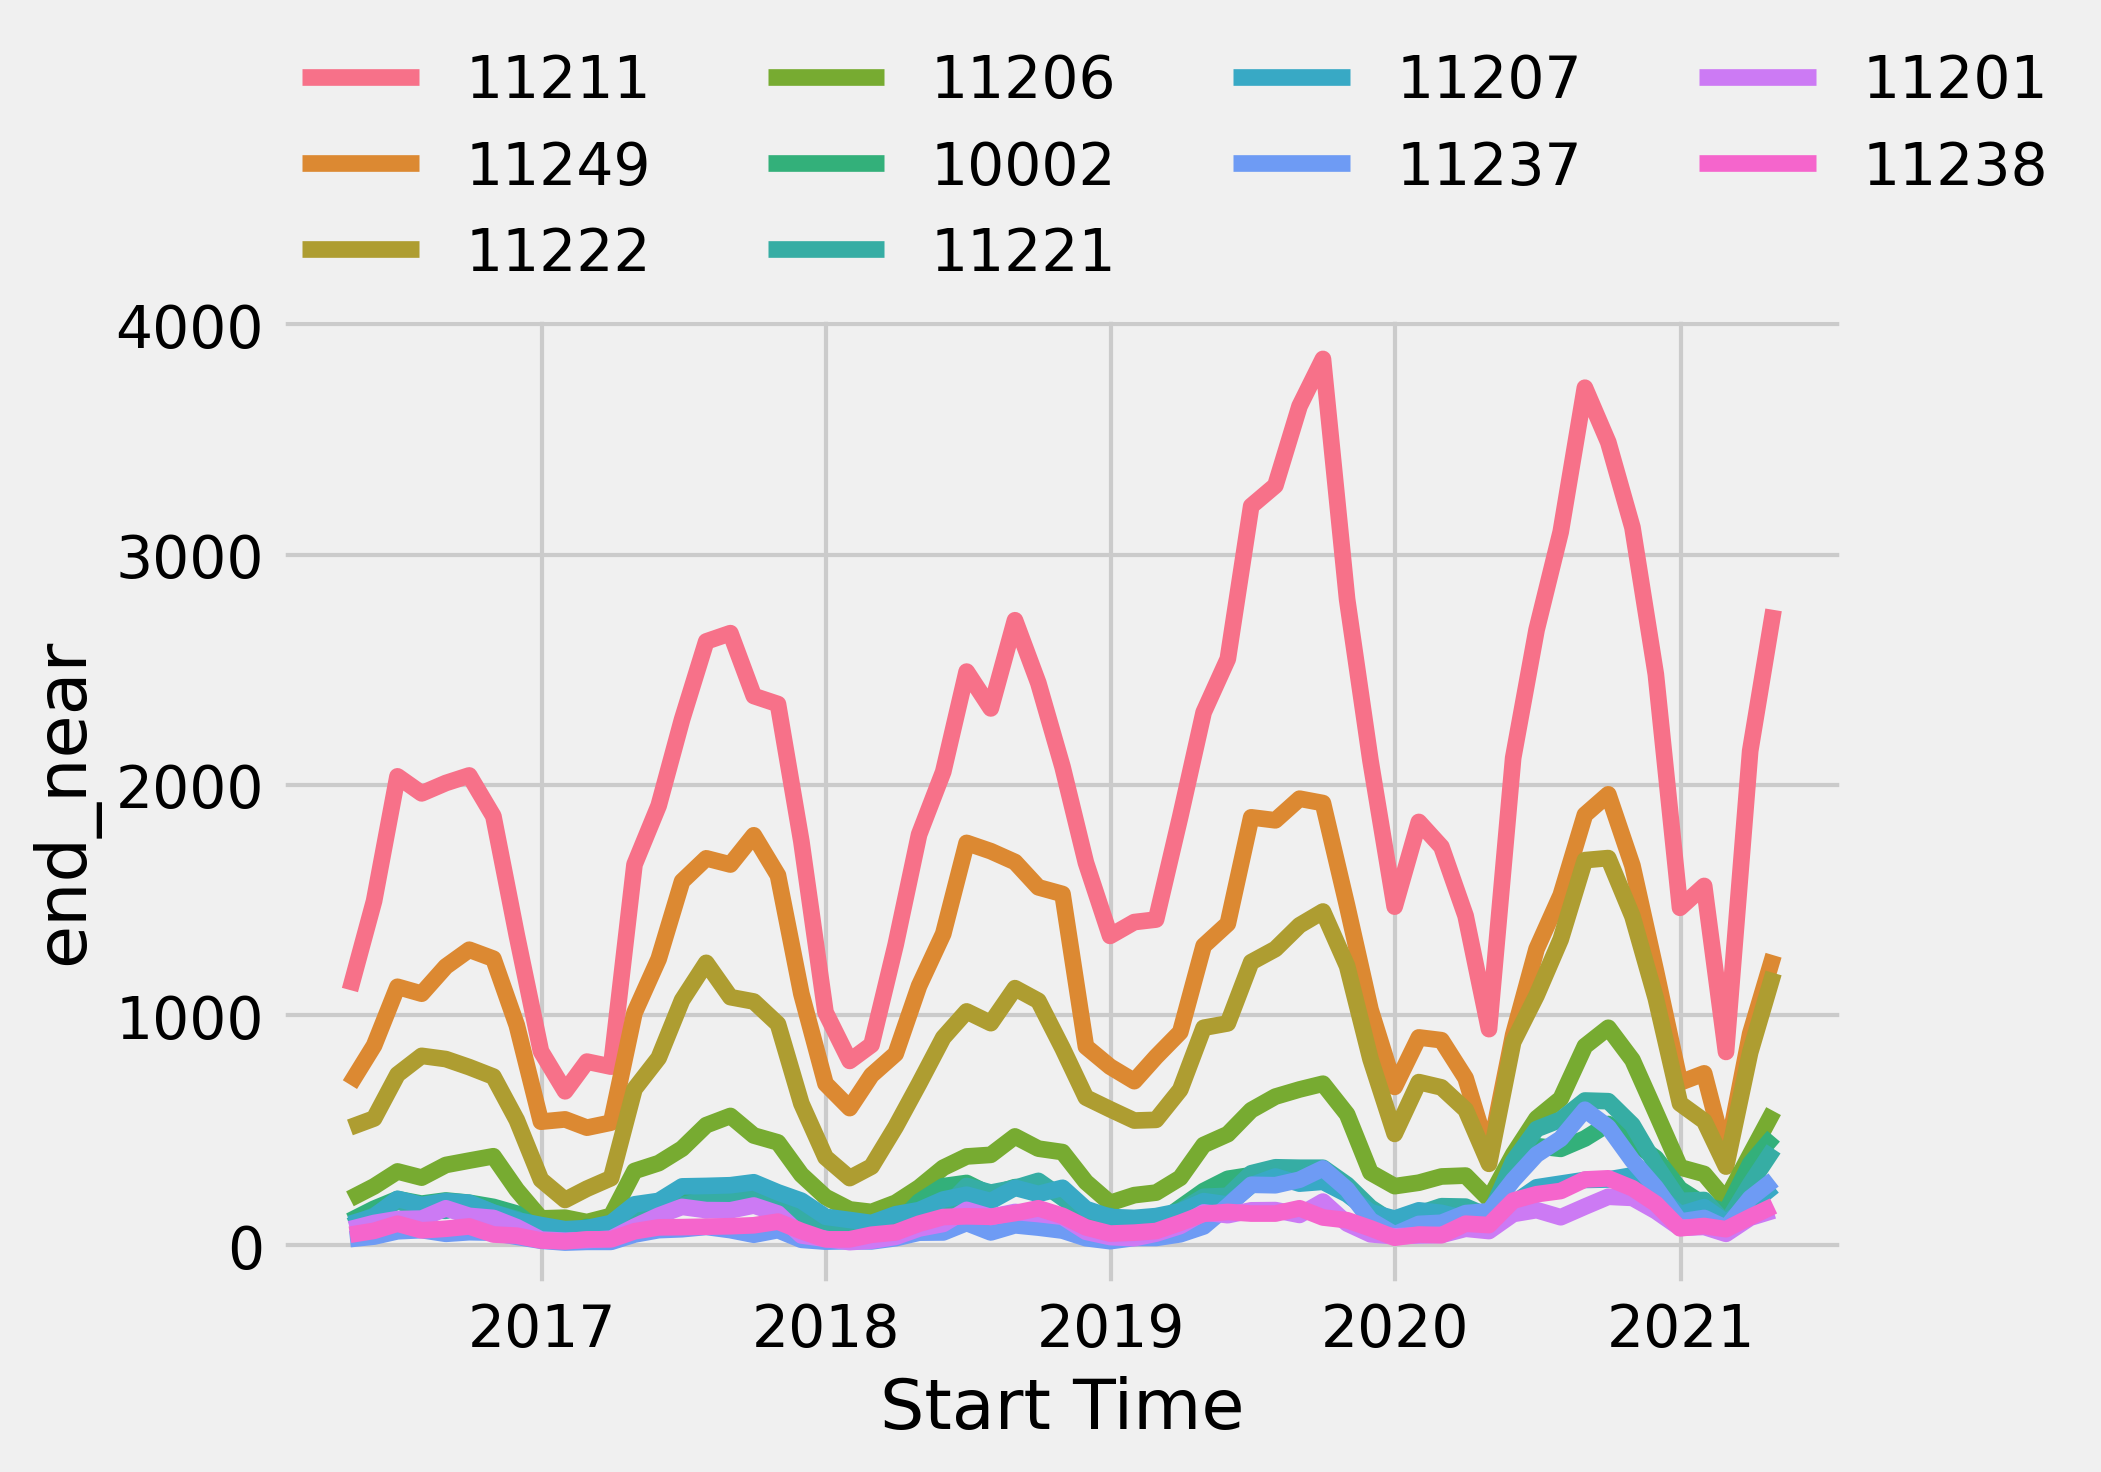

In [38]:
start_zipcode_10 = list(citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)
data_all = []
for zipcode in start_zipcode_10:
    data = pd.DataFrame(citi_end_near[citi_end_near['start_zipcode']==zipcode].resample(rule='M', on='Start Time')['end_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)
data = pd.DataFrame(citi_end_near.resample(rule='M', on='Start Time')['end_near'].sum())
# data['zipcode'] = 'ALL'
# data_all.append(data)
df = pd.concat(data_all, axis=0)

fig, ax = plt.subplots()
g = sns.lineplot(data=df, x="Start Time", y="end_near",hue='zipcode',ax=ax)

ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=4,
            borderaxespad=0, frameon=False)

In [39]:
start_zipcode_10 = list(citi[citi['end_near']==1]['start_zipcode'].value_counts().iloc[:10].index)
data_all = []
for zipcode in start_zipcode_10:
    data = pd.DataFrame(citi_end_near[citi_end_near['start_zipcode']==zipcode].resample(rule='M', on='Start Time')['end_near'].sum())
    data['zipcode'] = zipcode
    data_all.append(data)
data = pd.DataFrame(citi_end_near.resample(rule='M', on='Start Time')['end_near'].sum())
data['zipcode'] = 'ALL'
data_all.append(data)
df = pd.concat(data_all, axis=0)

In [40]:
df

end_near zipcode
Start Time                  
2016-04-30      1109   11211
2016-05-31      1496   11211
2016-06-30      2037   11211
2016-07-31      1963   11211
2016-08-31      2008   11211
...              ...     ...
2020-12-31      4971     ALL
2021-01-31      4998     ALL
2021-02-28      2870     ALL
2021-03-31      7197     ALL
2021-04-30     10002     ALL

[671 rows x 2 columns]

In [42]:
nyc_zip_df = geopandas.read_file("ZIP_CODE_040114.shp")  

In [43]:
nyc_zip_df.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [44]:
nyc_zip_df.head()

ZIPCODE BLDGZIP   PO_NAME  POPULATION          AREA STATE  COUNTY ST_FIPS  \
0   11436       0   Jamaica     18681.0  2.269930e+07    NY  Queens      36   
1   11213       0  Brooklyn     62426.0  2.963100e+07    NY   Kings      36   
2   11212       0  Brooklyn     83866.0  4.197210e+07    NY   Kings      36   
3   11225       0  Brooklyn     56527.0  2.369863e+07    NY   Kings      36   
4   11218       0  Brooklyn     72280.0  3.686880e+07    NY   Kings      36   

  CTY_FIPS                   URL  SHAPE_AREA  SHAPE_LEN  \
0      081  http://www.usps.com/         0.0        0.0   
1      047  http://www.usps.com/         0.0        0.0   
2      047  http://www.usps.com/         0.0        0.0   
3      047  http://www.usps.com/         0.0        0.0   
4      047  http://www.usps.com/         0.0        0.0   

                                            geometry  
0  POLYGON ((1038098.252 188138.380, 1038141.936 ...  
1  POLYGON ((1001613.713 186926.440, 1002314.243 ...  
2  POLYGON ((1011174.276 183696.338, 1011373.584 ...  
3  POLYGON ((995908.365 183617.613, 996522.848 18...  
4  POLYGON ((991997.113 176307.496, 992042.798 17...

In [45]:
nyc_zip_df.columns

Index(['ZIPCODE', 'BLDGZIP', 'PO_NAME', 'POPULATION', 'AREA', 'STATE',
       'COUNTY', 'ST_FIPS', 'CTY_FIPS', 'URL', 'SHAPE_AREA', 'SHAPE_LEN',
       'geometry'],
      dtype='object')

In [46]:
thing = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].reset_index()
# new_thing = thing.merge(nyc_zip_df, left_on='index' ,right_on='ZIPCODE')
new_thing2 = nyc_zip_df.merge(thing, right_on='index' ,left_on='ZIPCODE')


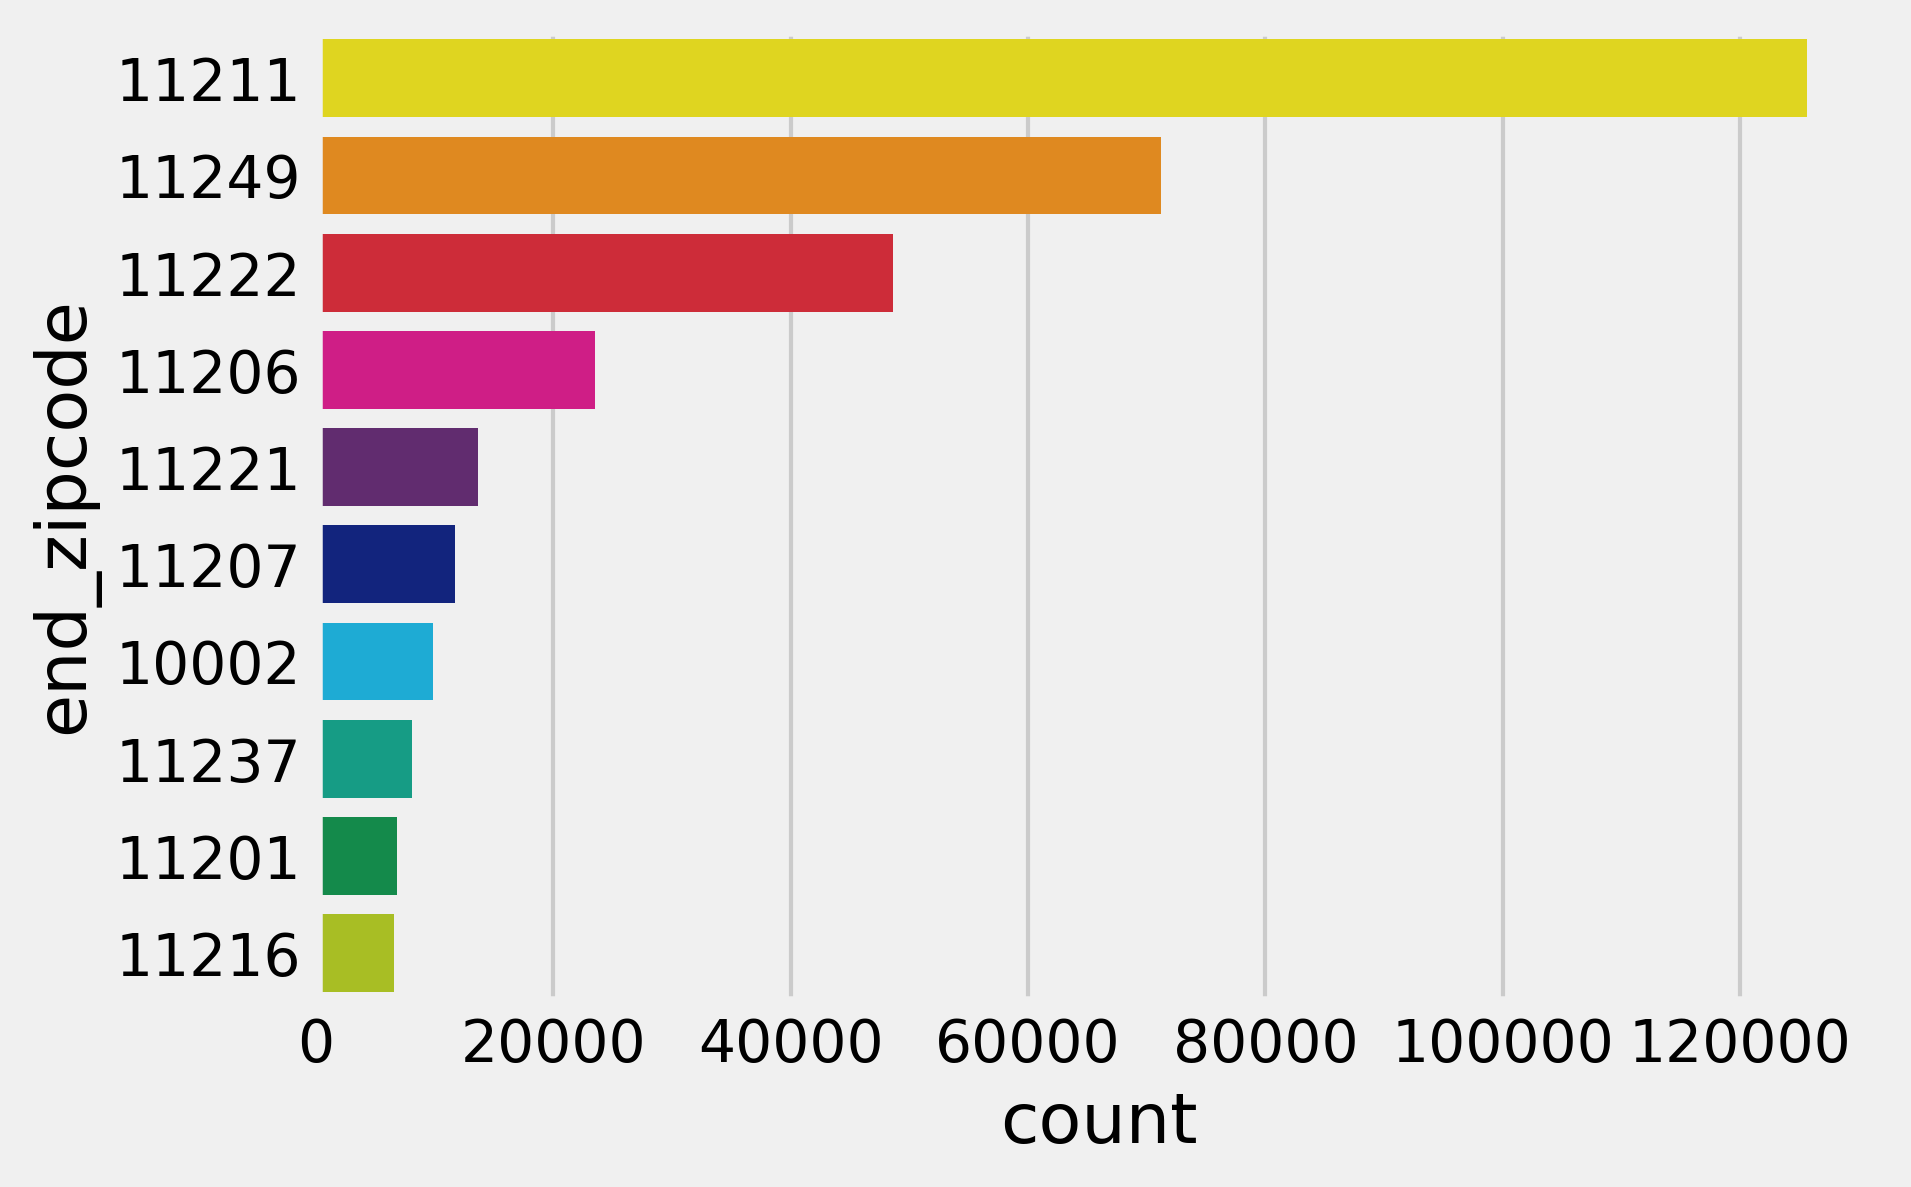

In [47]:
color = ['#fff100',
         '#ff8c00',
         '#e81123',
         '#ec008c',
         '#68217a',
         '#00188f',
         '#00bcf2',
         '#00b294',
         '#009e49',
         '#bad80a']

g = sns.countplot(y="end_zipcode", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index,
                  palette=color,
                  )

In [98]:
color = ['#fff100',
         '#ff8c00',
         '#e81123',
         '#ec008c',
         '#68217a',
         '#00188f',
         '#00bcf2',
         '#00b294',
         '#009e49',
         '#bad80a']
zips_code = list(citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index)
color_mapping = dict(zip(zips_code,color))


# new_thing2.plot(color=new_thing2["ZIPCODE"].map(color_mapping))
fig,axs = plt.subplots(2,figsize = (30, 30))

zip_boundry_map = nyc_zip_df.boundary.plot(color='Black', linewidth=.5,ax=axs[1])
new_thing2.plot(color=new_thing2["ZIPCODE"].map(color_mapping),ax=zip_boundry_map)
gstart_stations.plot(color='red', markersize = 10,ax=zip_boundry_map)
# zip_boundry_map.axis('off')


minx, miny, maxx, maxy = new_thing2.total_bounds
axs[1].set_xlim(minx, maxx)
axs[1].set_ylim(miny, maxy)

g = sns.countplot(y="end_zipcode", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].index,
                  palette=color,
                  ax=axs[0]
                  )


In [49]:
citi.head()

Trip Duration          Start Time           Stop Time  Start Station ID  \
0            236 2016-04-01 00:02:15 2016-04-01 00:06:12            3087.0   
1            764 2016-04-01 00:38:04 2016-04-01 00:50:48            3079.0   
2            172 2016-04-01 00:55:38 2016-04-01 00:58:30            3087.0   
3            349 2016-04-01 01:05:46 2016-04-01 01:11:36            3067.0   
4            258 2016-04-01 01:25:52 2016-04-01 01:30:11            3082.0   

              Start Station Name  Start Station Latitude  \
0  Metropolitan Ave & Meeker Ave               40.714133   
1          Leonard St & Grand St               40.711035   
2  Metropolitan Ave & Meeker Ave               40.714133   
3          Broadway & Whipple St               40.701666   
4            Hope St & Union Ave               40.711674   

   Start Station Longitude  End Station ID            End Station Name  \
0               -73.952344          3086.0   Graham Ave & Conselyea St   
1               -73.947143          3055.0   Greene Ave & Nostrand Ave   
2               -73.952344          3082.0         Hope St & Union Ave   
3               -73.943730          3079.0       Leonard St & Grand St   
4               -73.951413          3076.0  Scholes St & Manhattan Ave   

   End Station Latitude  ...  Bike ID   User Type Birth Year  Gender  \
0             40.715143  ...    15919  Subscriber     1990.0       1   
1             40.688334  ...    15202  Subscriber     1985.0       1   
2             40.711674  ...    18680  Subscriber     1972.0       2   
3             40.711035  ...    15925  Subscriber     1968.0       1   
4             40.708704  ...    18680  Subscriber     1972.0       2   

   start_near  end_near  both_near  end_zipcode start_zipcode YearMonth  
0           1         0          0        11211         11211    2016-4  
1           1         0          0        11216         11222    2016-4  
2           1         1          1        11211         11211    2016-4  
3           0         1          0        11222         11207    2016-4  
4           1         0          0        11206         11211    2016-4  

[5 rows x 21 columns]

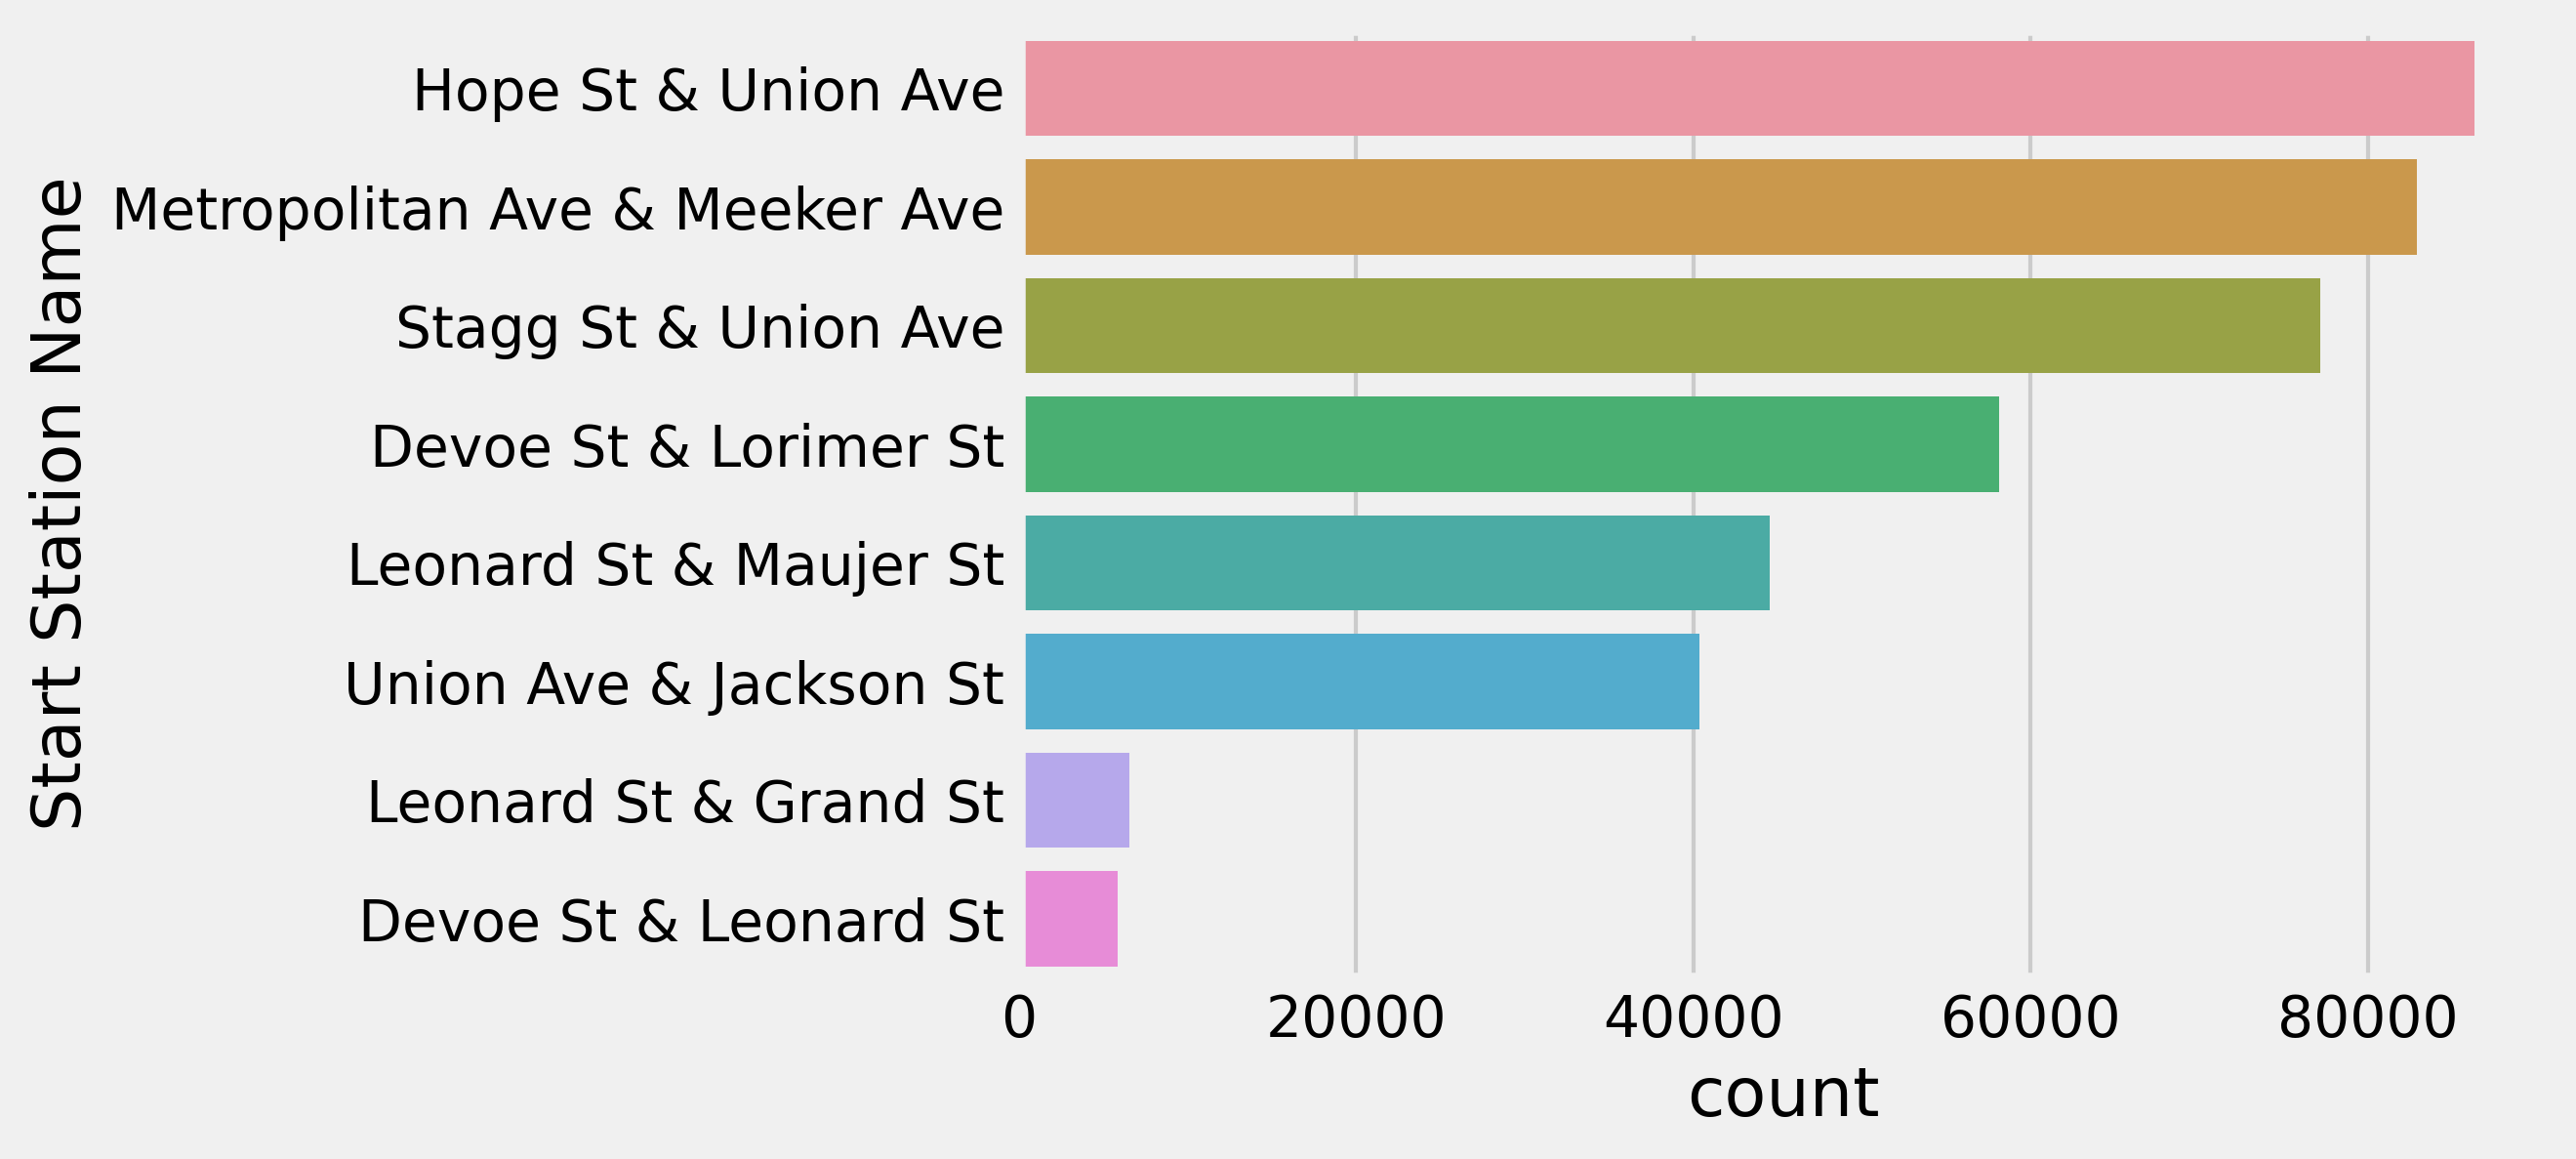

In [50]:
g = sns.countplot(y="Start Station Name", 
                  data=citi[citi['start_near']==1],
                  order = citi[citi['start_near']==1]['Start Station Name'].value_counts().index)



In [173]:
# designate coordinate system
crs = 'EPSG:2263'

# create GeoPandas dataframe
gstart_stations = geopandas.GeoDataFrame(start_stations,
                                     crs = crs,
                                     geometry=geopandas.points_from_xy(start_stations['Start Station Longitude'], 
                                      start_stations['Start Station Latitude']))




In [174]:
crs = 'EPSG:2263'
gciti_bike2 = geopandas.GeoDataFrame(start_stations,
                                     crs = crs,
                                     geometry=geopandas.points_from_xy(start_stations['Start Station Latitude'], 
                                      start_stations['Start Station Longitude']))


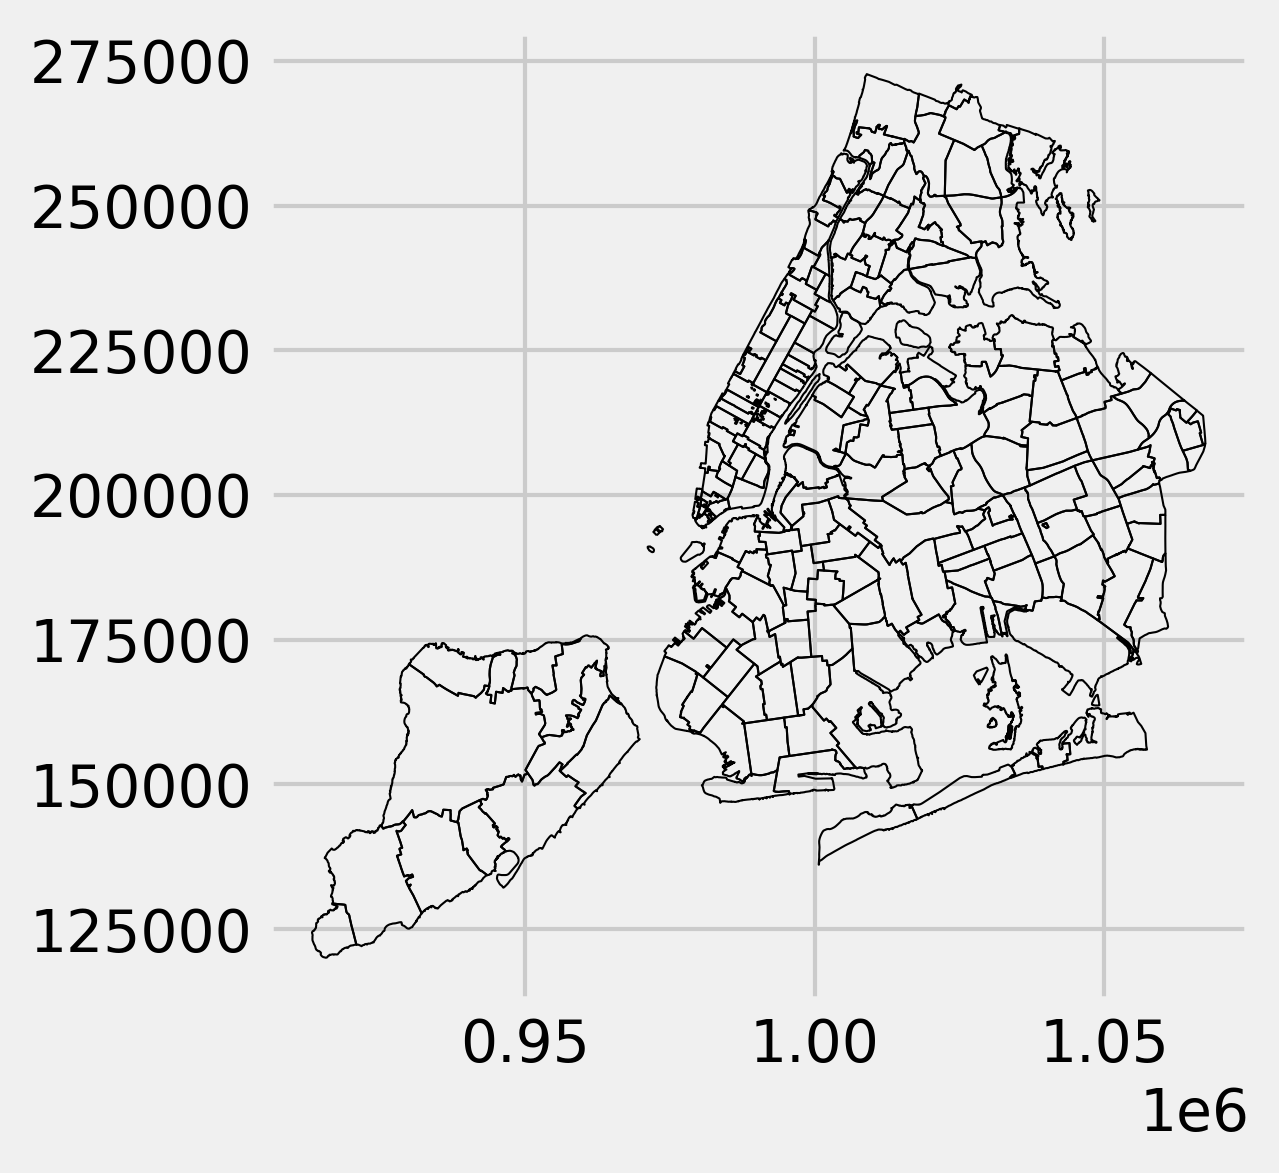

In [127]:
zip_boundry_map = nyc_zip_df.boundary.plot(color='Black', linewidth=.5)



In [170]:
nyc_zip_df.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [172]:
gciti_bike.crs =  "EPSG:2263"
gciti_bike2.crs =  "EPSG:2263"

<AxesSubplot:>

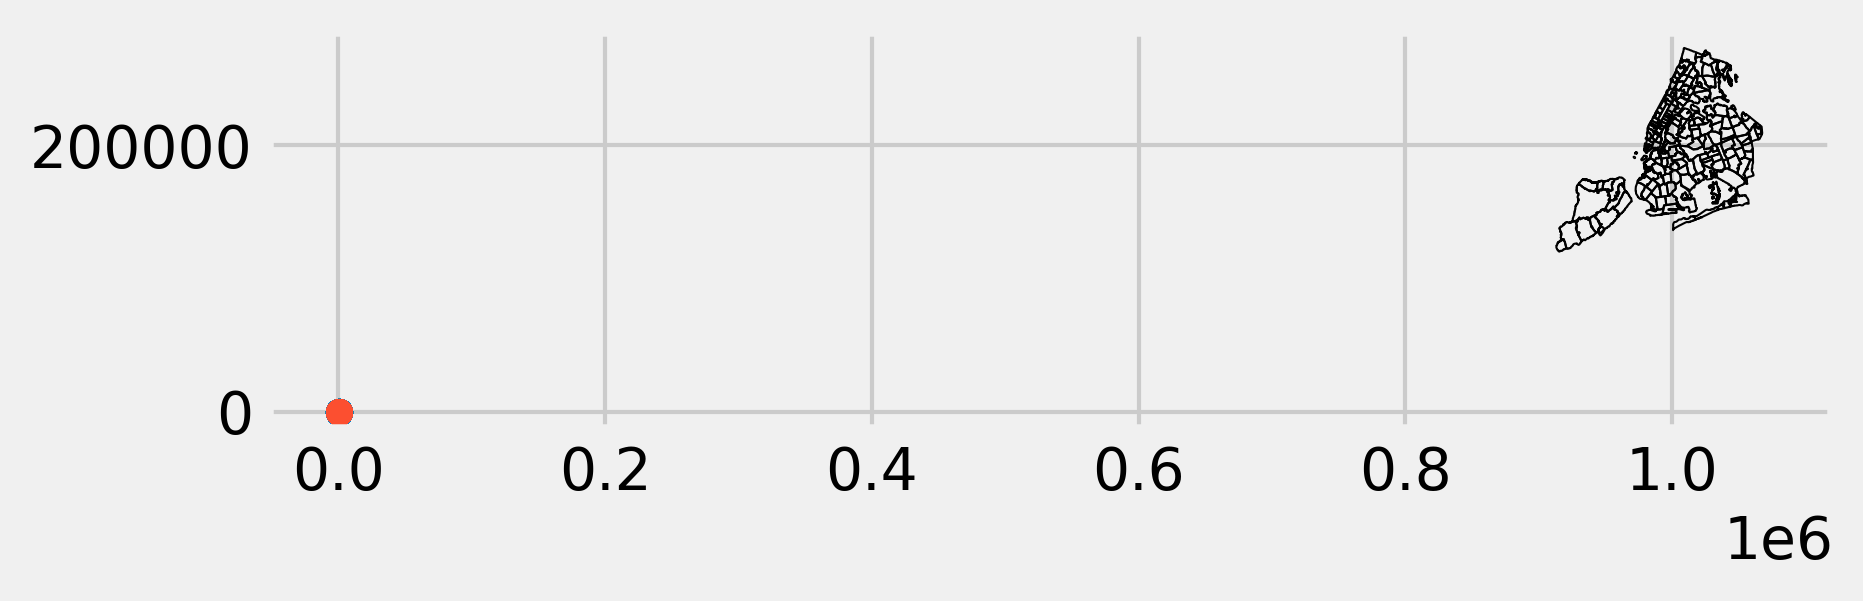

In [175]:
zip_boundry_map = nyc_zip_df.boundary.plot(color='Black', linewidth=.5)
gciti_bike.plot(ax=zip_boundry_map)

gciti_bike2.plot(ax=zip_boundry_map)


<AxesSubplot:>

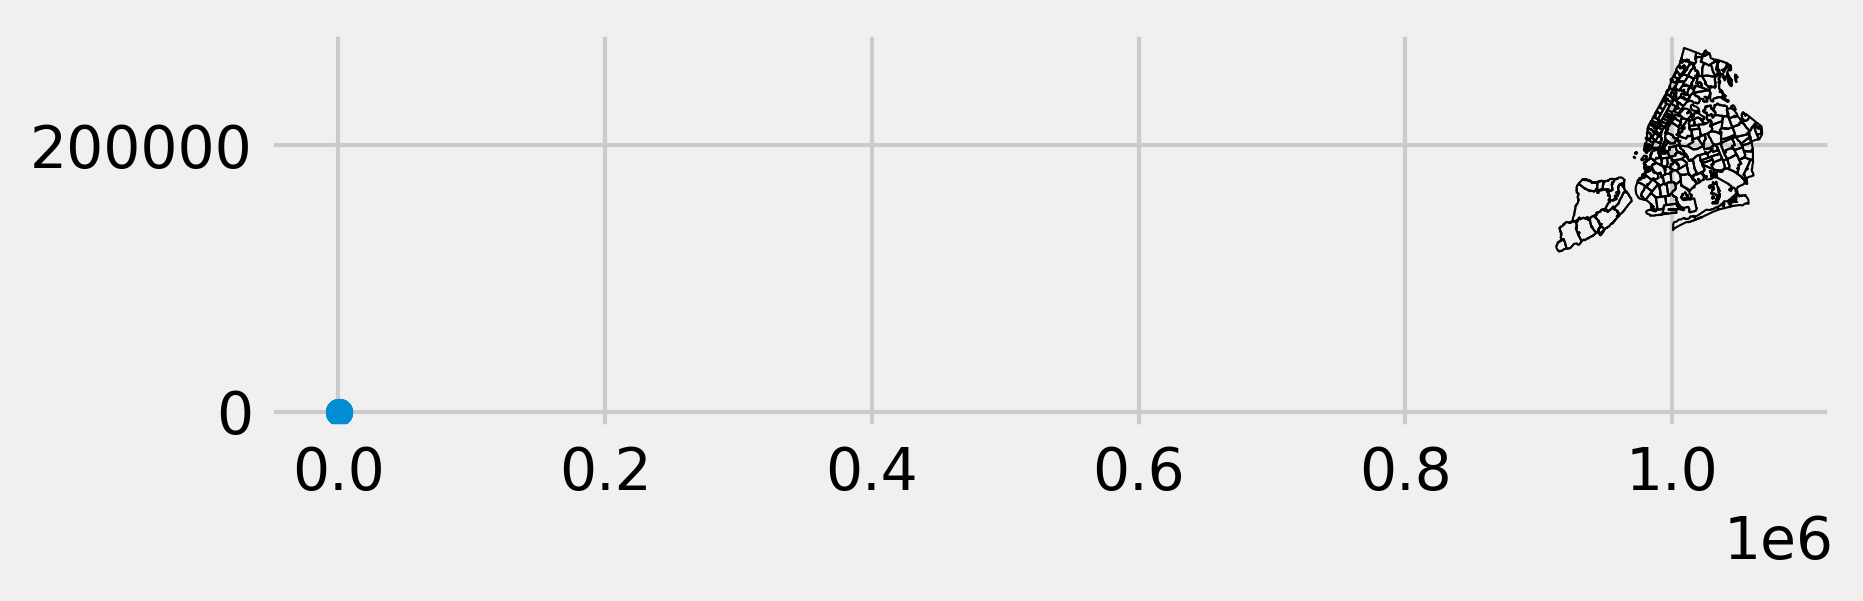

In [176]:
zip_boundry_map = nyc_zip_df.boundary.plot(color='Black', linewidth=.5)

gciti_bike2.plot(ax=zip_boundry_map)

<AxesSubplot:>

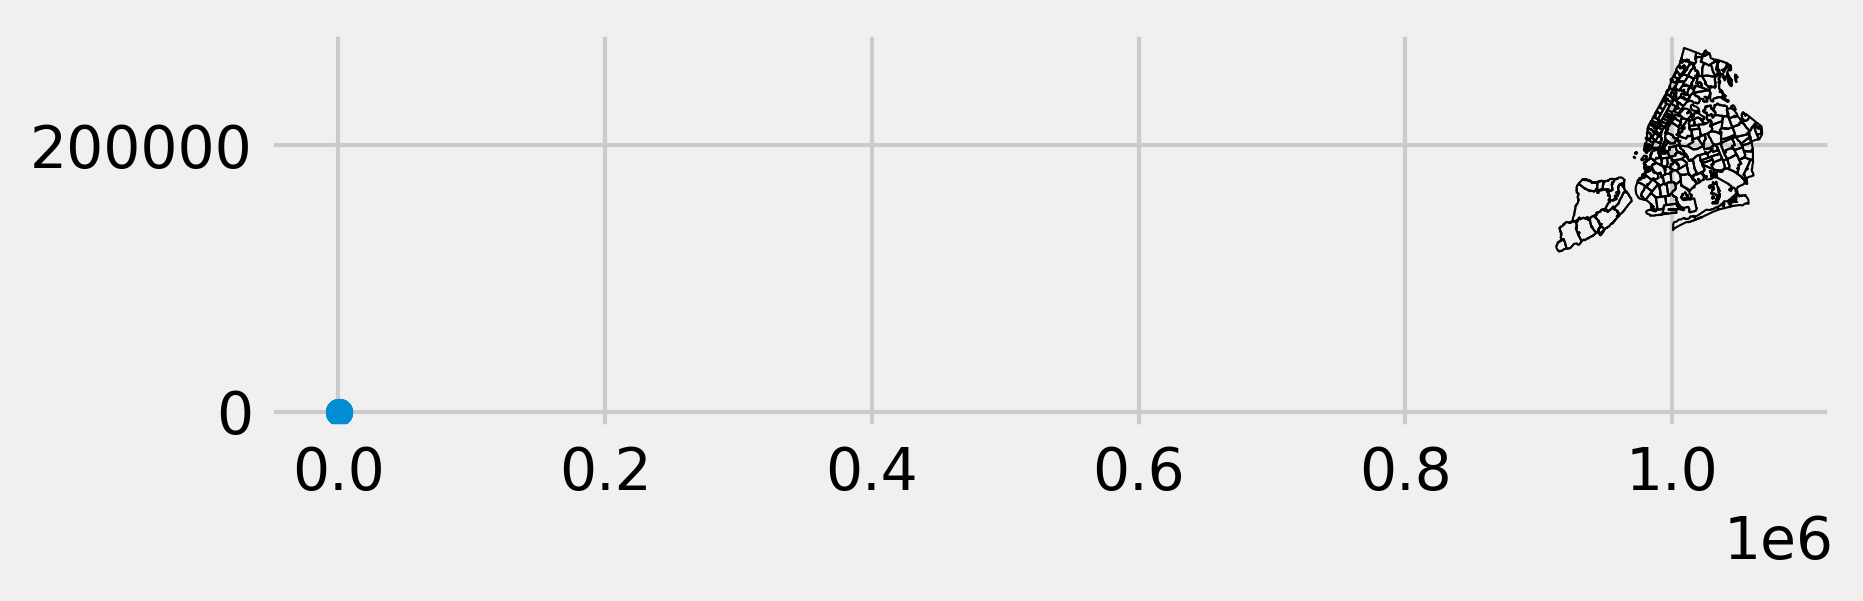

In [179]:
zip_boundry_map = nyc_zip_df.boundary.plot(color='Black', linewidth=.5)

gstart_stations.plot(ax=zip_boundry_map)

<AxesSubplot:>

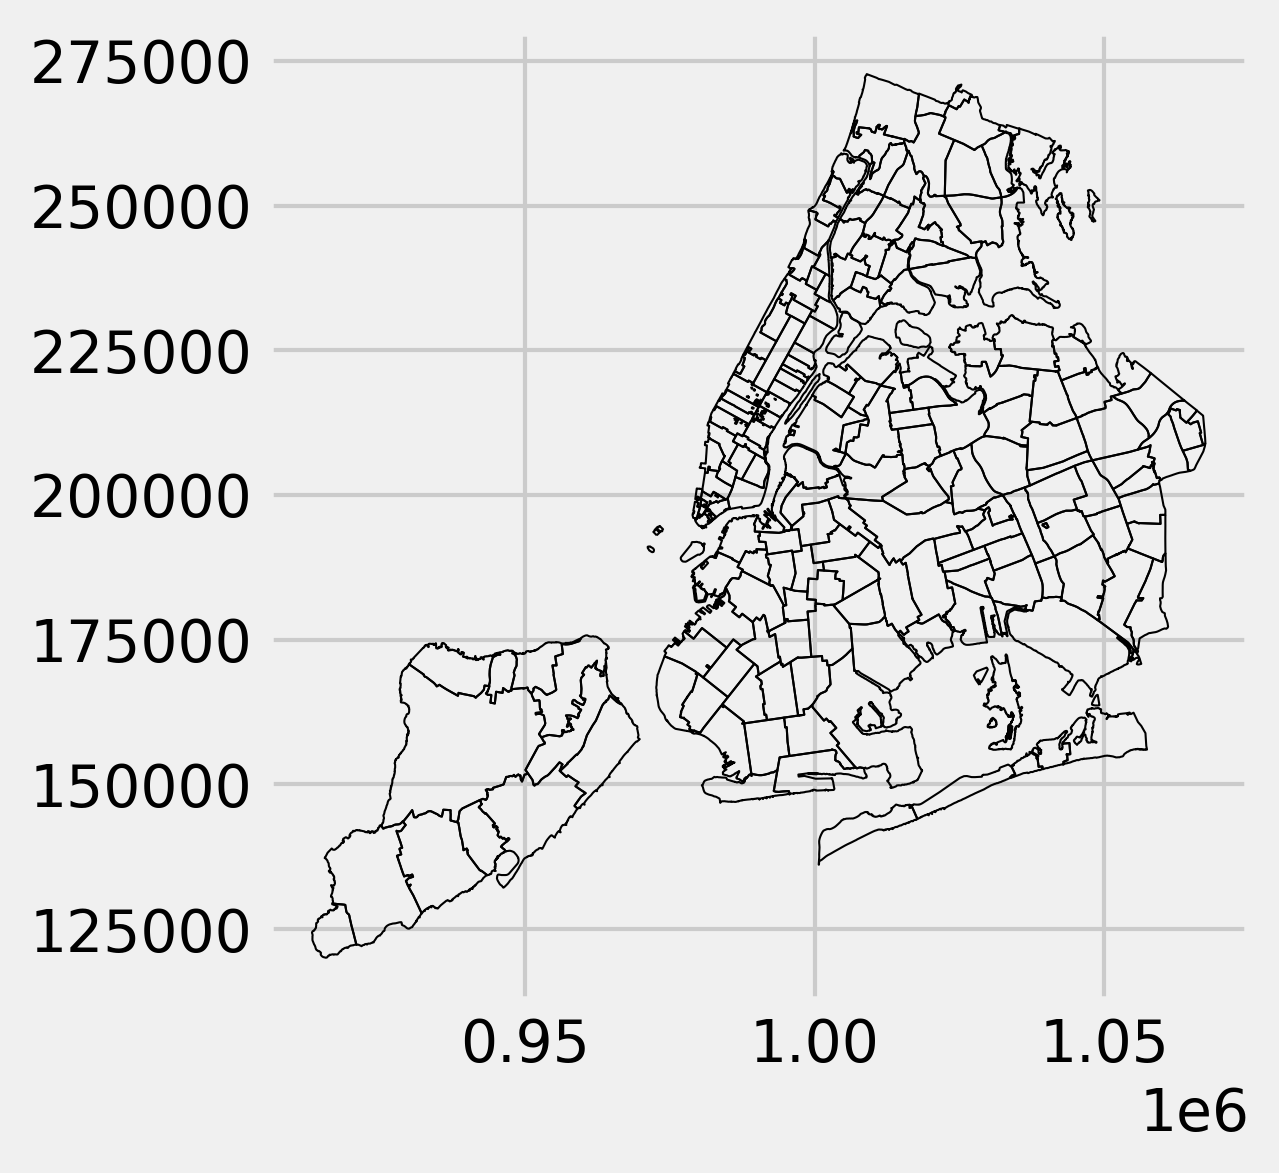

In [180]:
nyc_zip_df.boundary.plot(color='Black', linewidth=.5)

<AxesSubplot:>

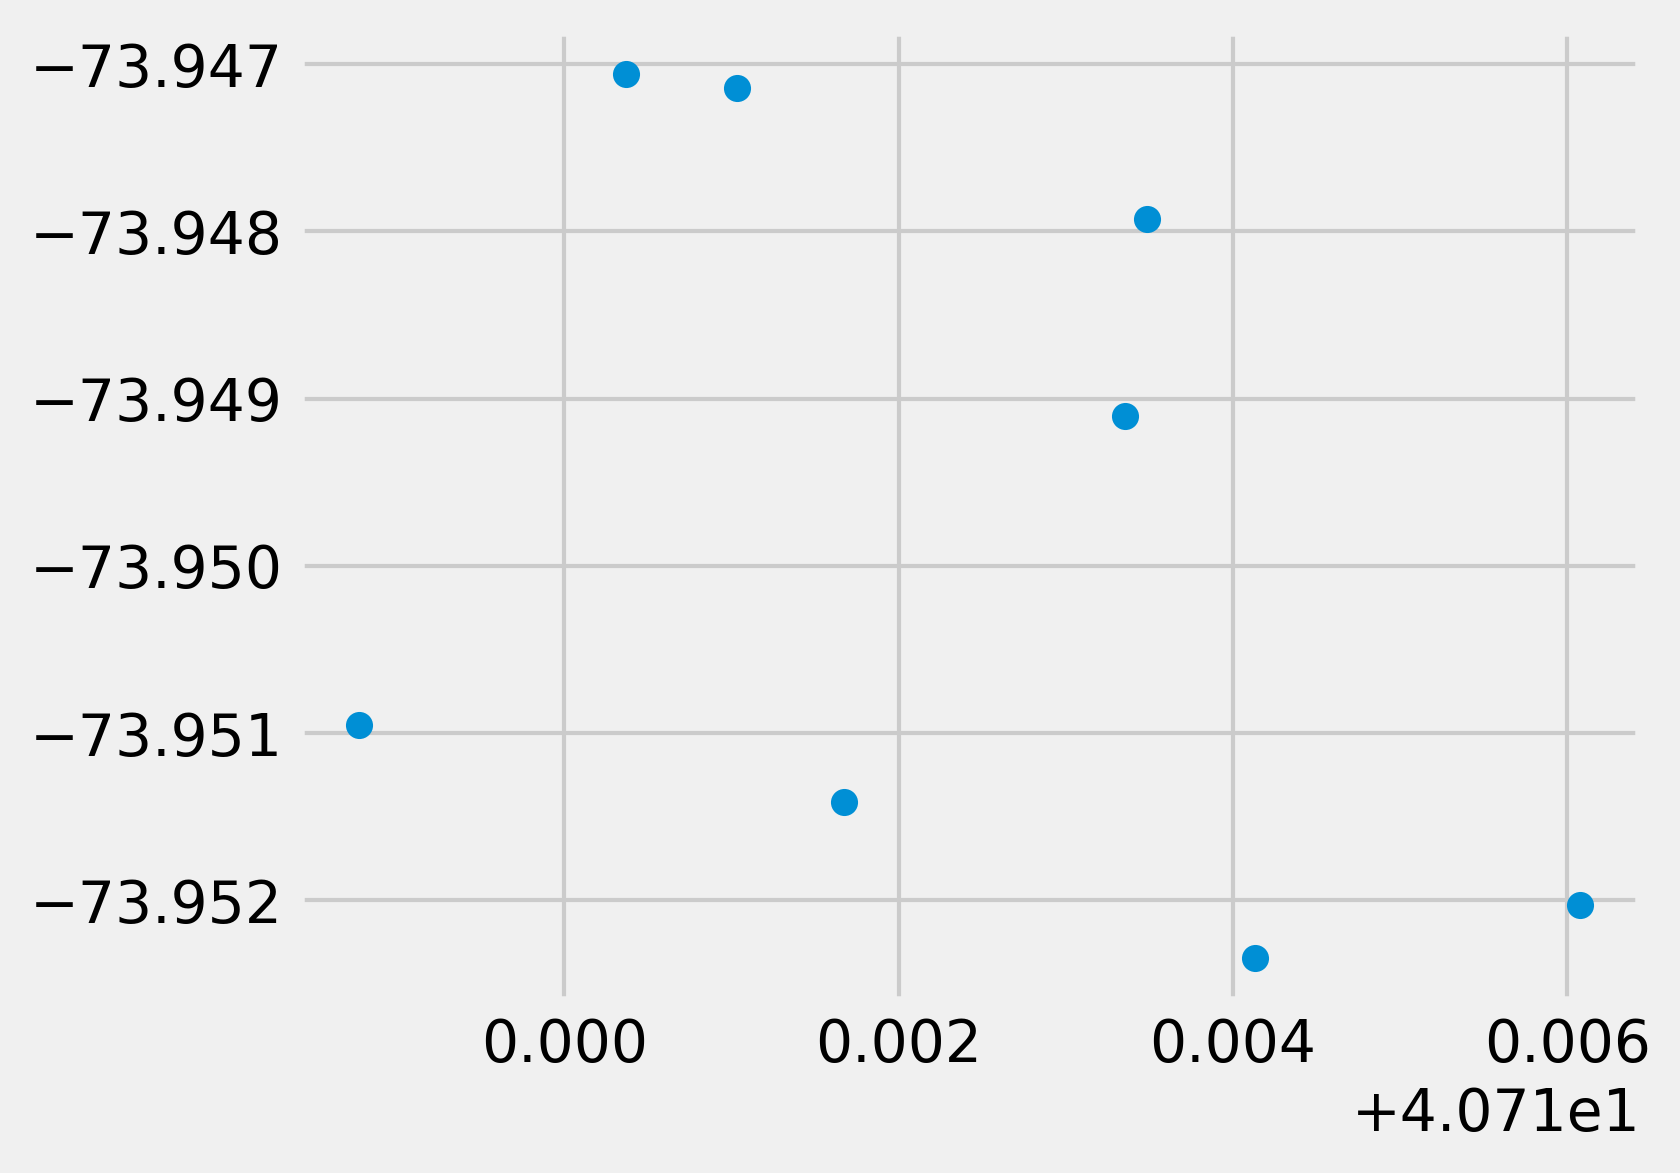

In [181]:
gstart_stations.plot()

In [ ]:
thing = citi[citi['start_near']==1]['end_zipcode'].value_counts().iloc[:10].reset_index()
# new_thing = thing.merge(nyc_zip_df, left_on='index' ,right_on='ZIPCODE')
new_thing2 = nyc_zip_df.merge(thing, right_on='index' ,left_on='ZIPCODE')



In [1]:
citi

NameError: name 'citi' is not defined